# Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_colwidth', 150)

# Data Info

In [23]:
data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=1)
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
print('Number of Rows:', data.shape[0])
print('Number of Features:', data.shape[1])

Number of Rows: 5630
Number of Features: 20


In [14]:
df_dict = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=0)
df_dict = df_dict.iloc[:,2:4]
df_dict

,Unnamed: 2,Unnamed: 3
0,Variable,Discerption
1,CustomerID,Unique customer ID
2,Churn,Churn Flag
3,Tenure,Tenure of customer in organization
4,PreferredLoginDevice,Preferred login device of customer
5,CityTier,City tier
6,WarehouseToHome,Distance in between warehouse to home of customer
7,PreferredPaymentMode,Preferred payment method of customer
8,Gender,Gender of customer
9,HourSpendOnApp,Number of hours spend on mobile application or website


In [17]:
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# Exploratory Data Analysis

In [4]:
# create new data for EDA
eda = data.copy()

In [5]:
# devide category and numeric
cat = eda.select_dtypes(include='object').columns
num = eda.select_dtypes(exclude='object').columns

In [9]:
eda['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [7]:
num

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Descriptive Analysis

In [129]:
# target 
eda['Churn'].value_counts()/len(eda)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [29]:
eda[num].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [30]:
# Unique Values
col = eda[cat].columns

for i in col:
    print(eda[i].value_counts(), '\n')

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64 

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64 

Male      3384
Female    2246
Name: Gender, dtype: int64 

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 



`PreferredLoginDevice`
- we will combine `Phone` and `Mobile Phone`  values into one <br>

`PreferredPaymentMode`
- We will combine `Credit Card` and `CC` into 1 value
- We will combine `COD` and `Cash On Delivery` into 1 value <br>

`PreferedOrderCat`
- We will combine `Mobile Phone` and `Mobile` into 1 value

## Univariate Analysis

### Boxplot

In [35]:
# check how many Numerical features
len(num)

15

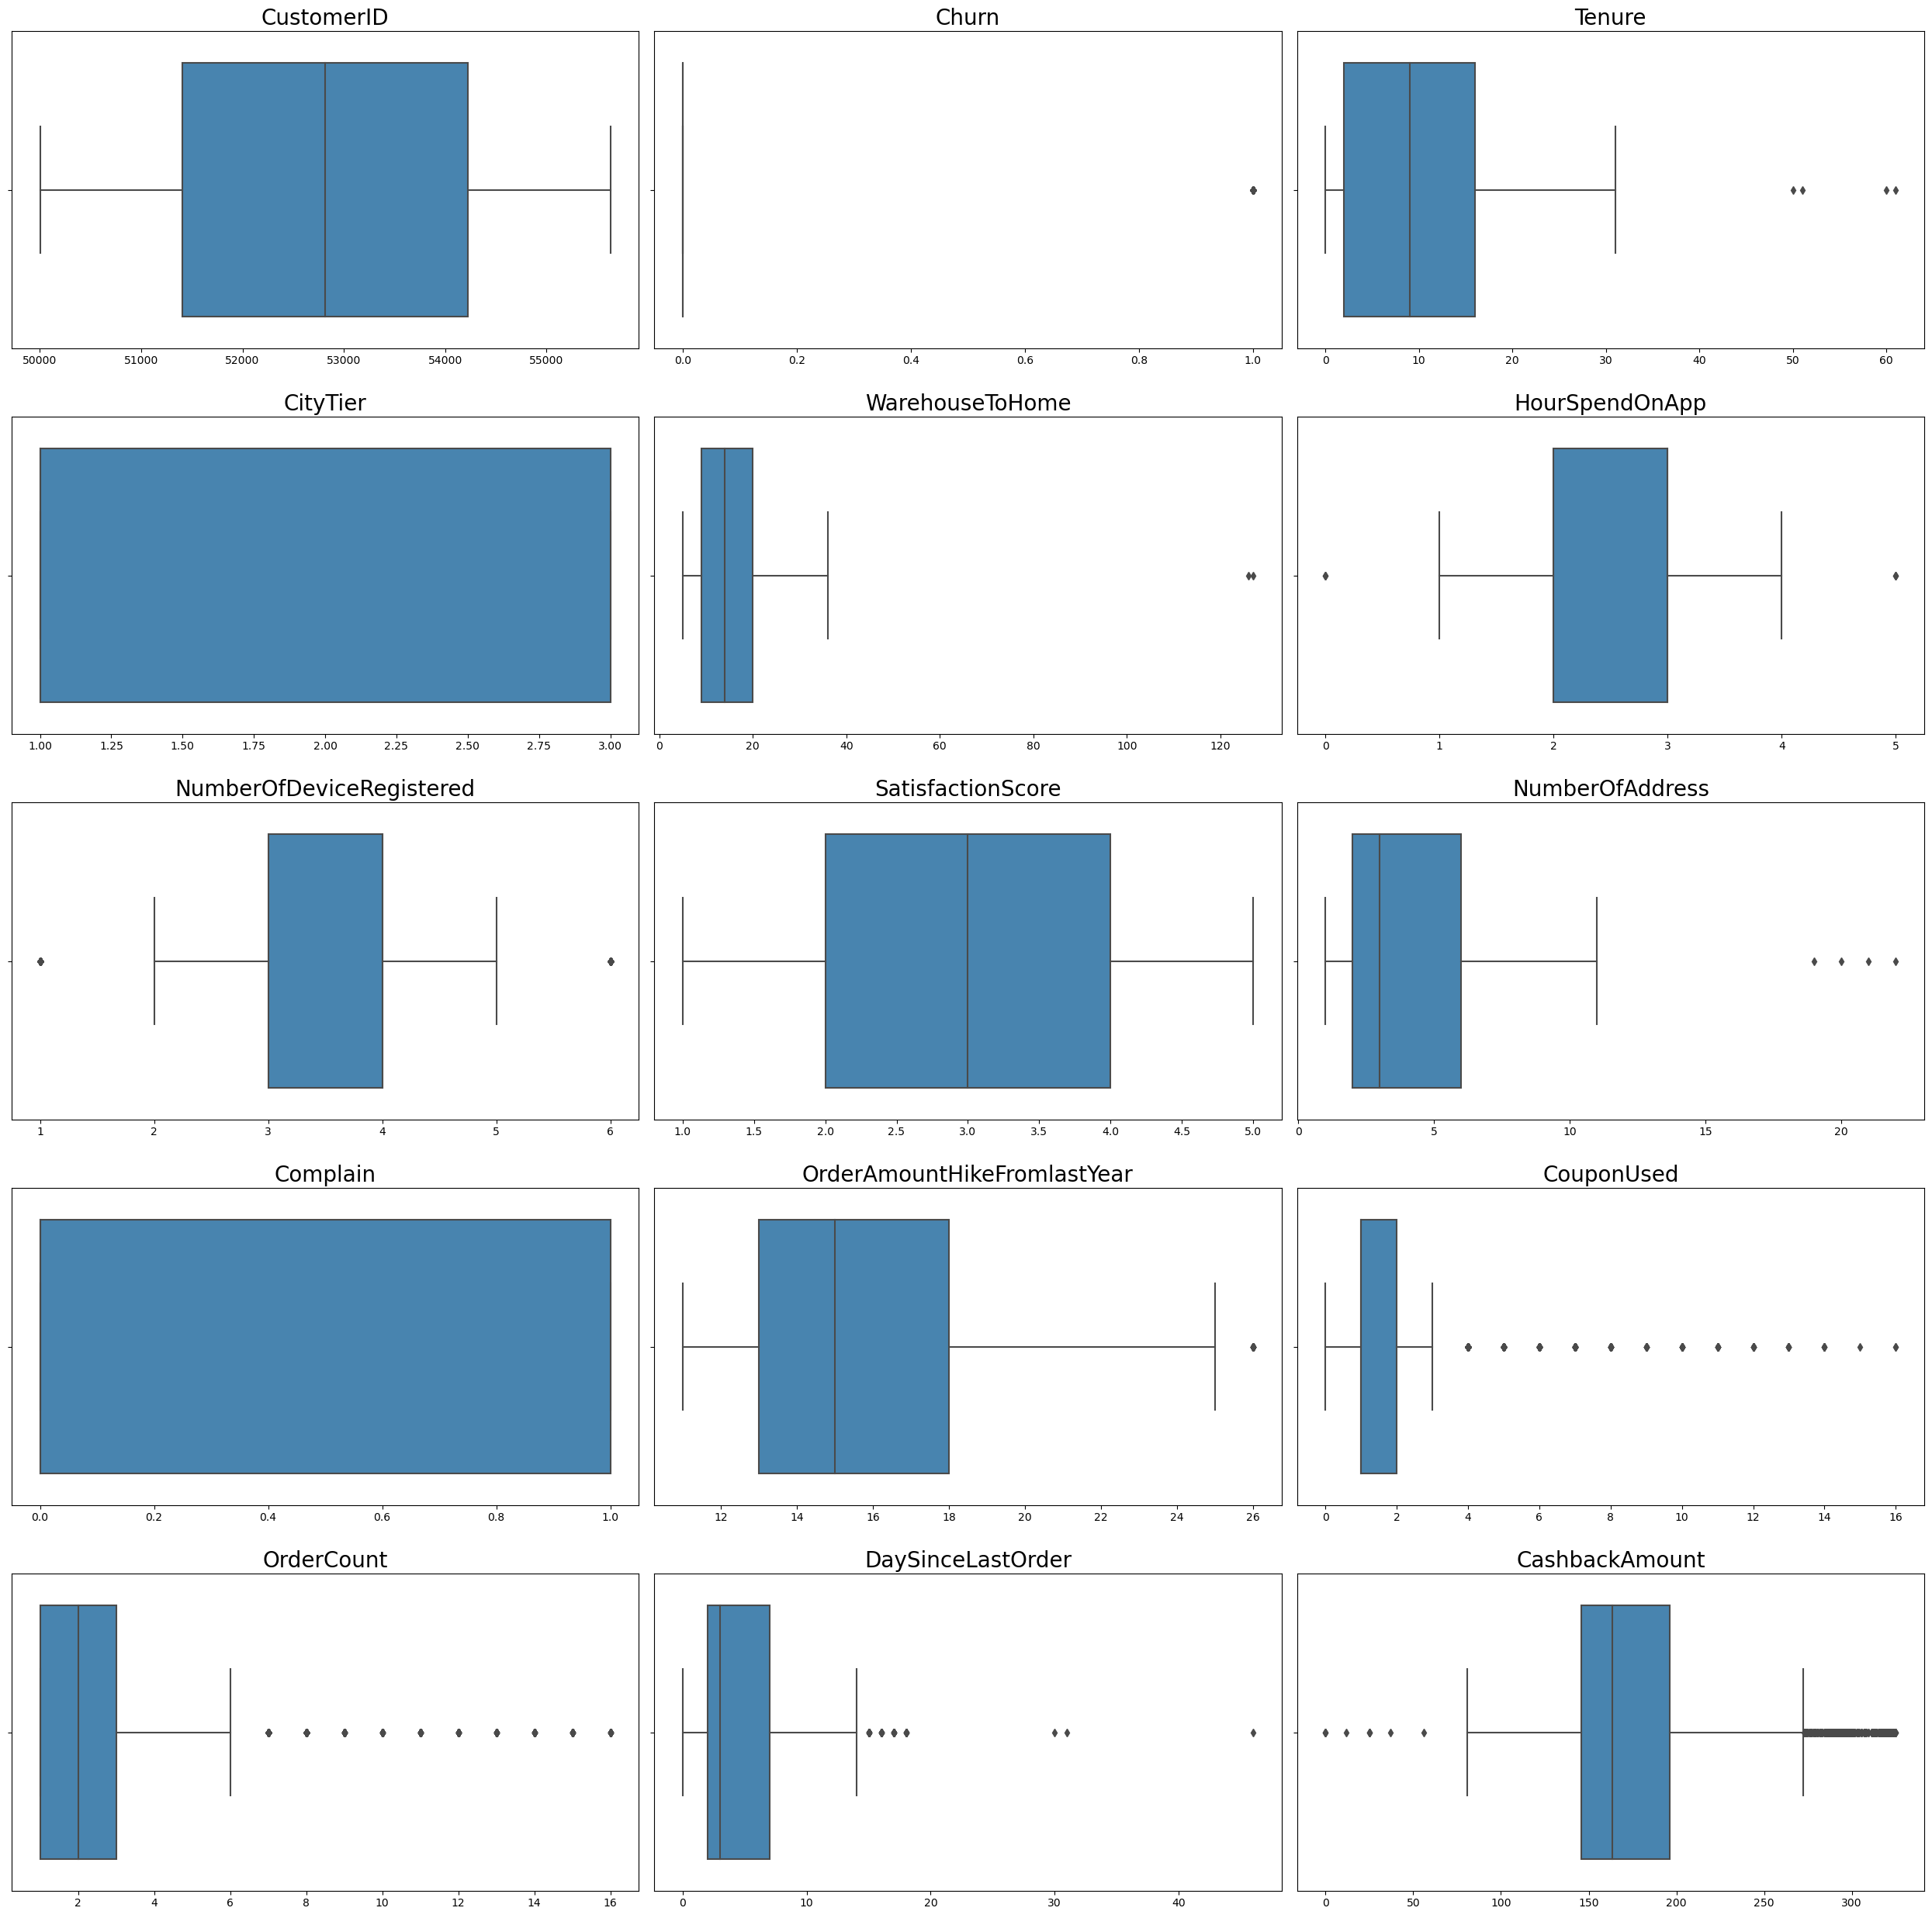

In [38]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- Few outliers
- `CashBackAmount` has lil bit high outliers

### Displot

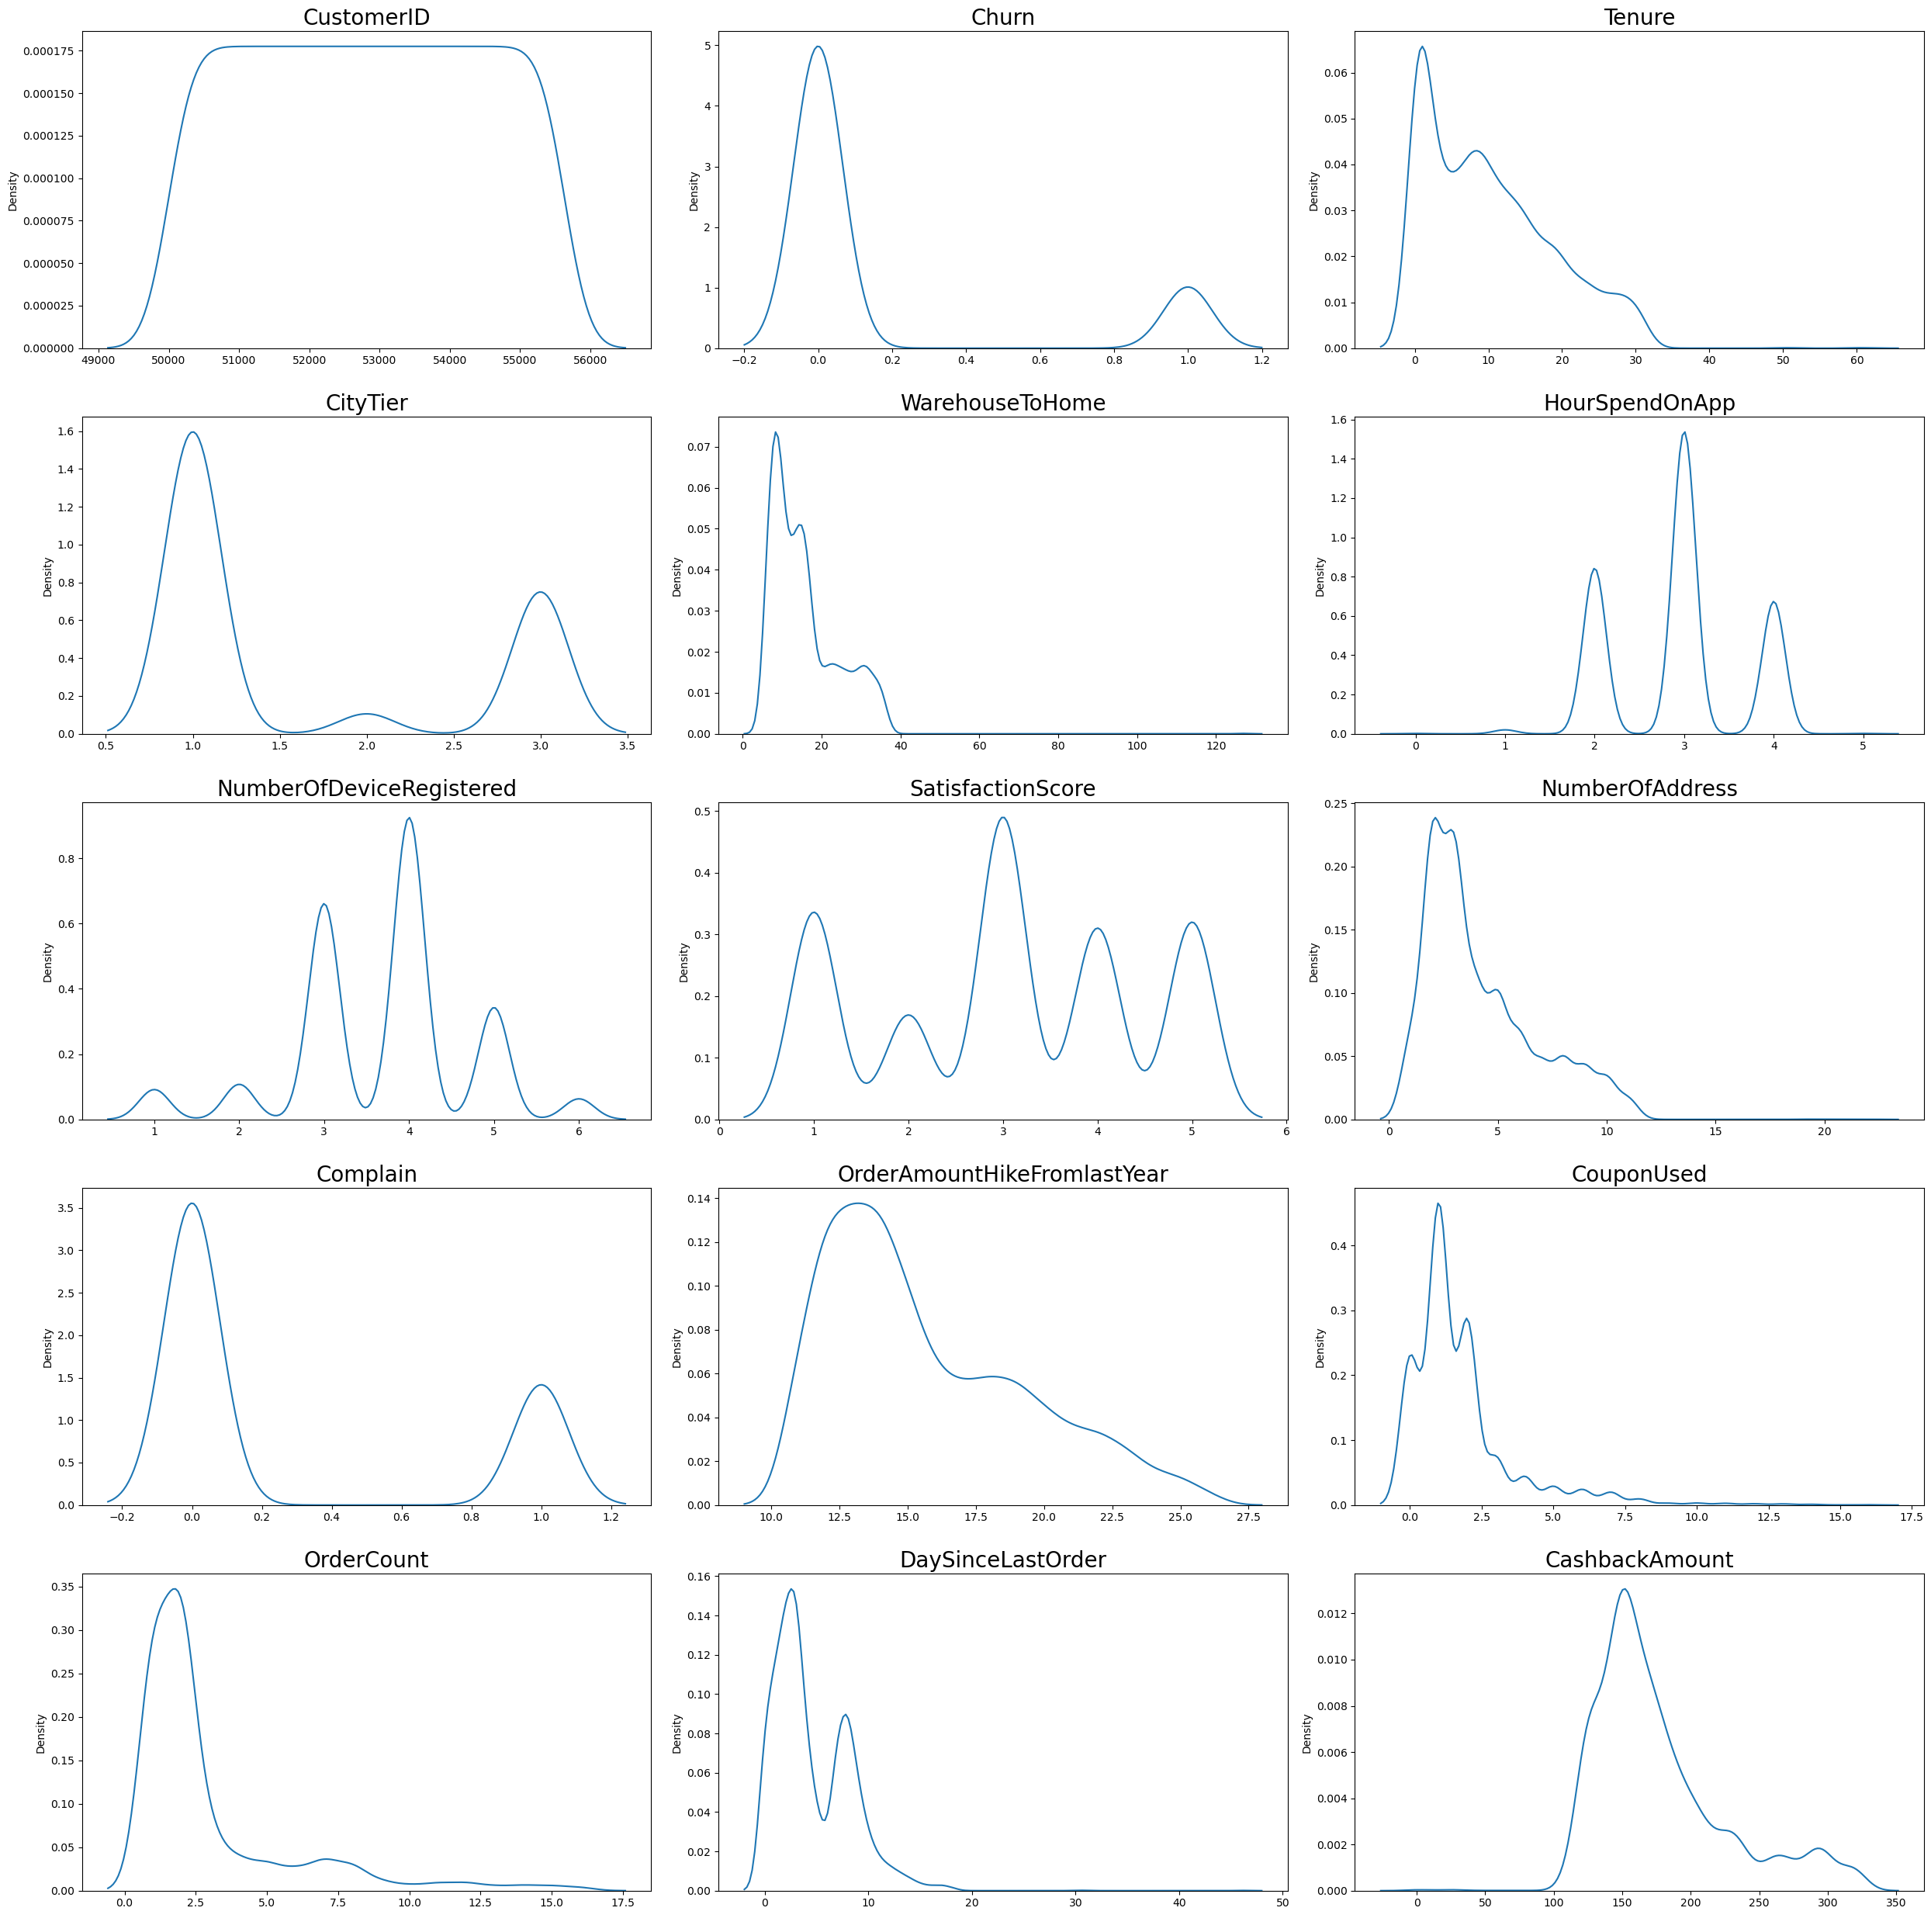

In [40]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Violinplot

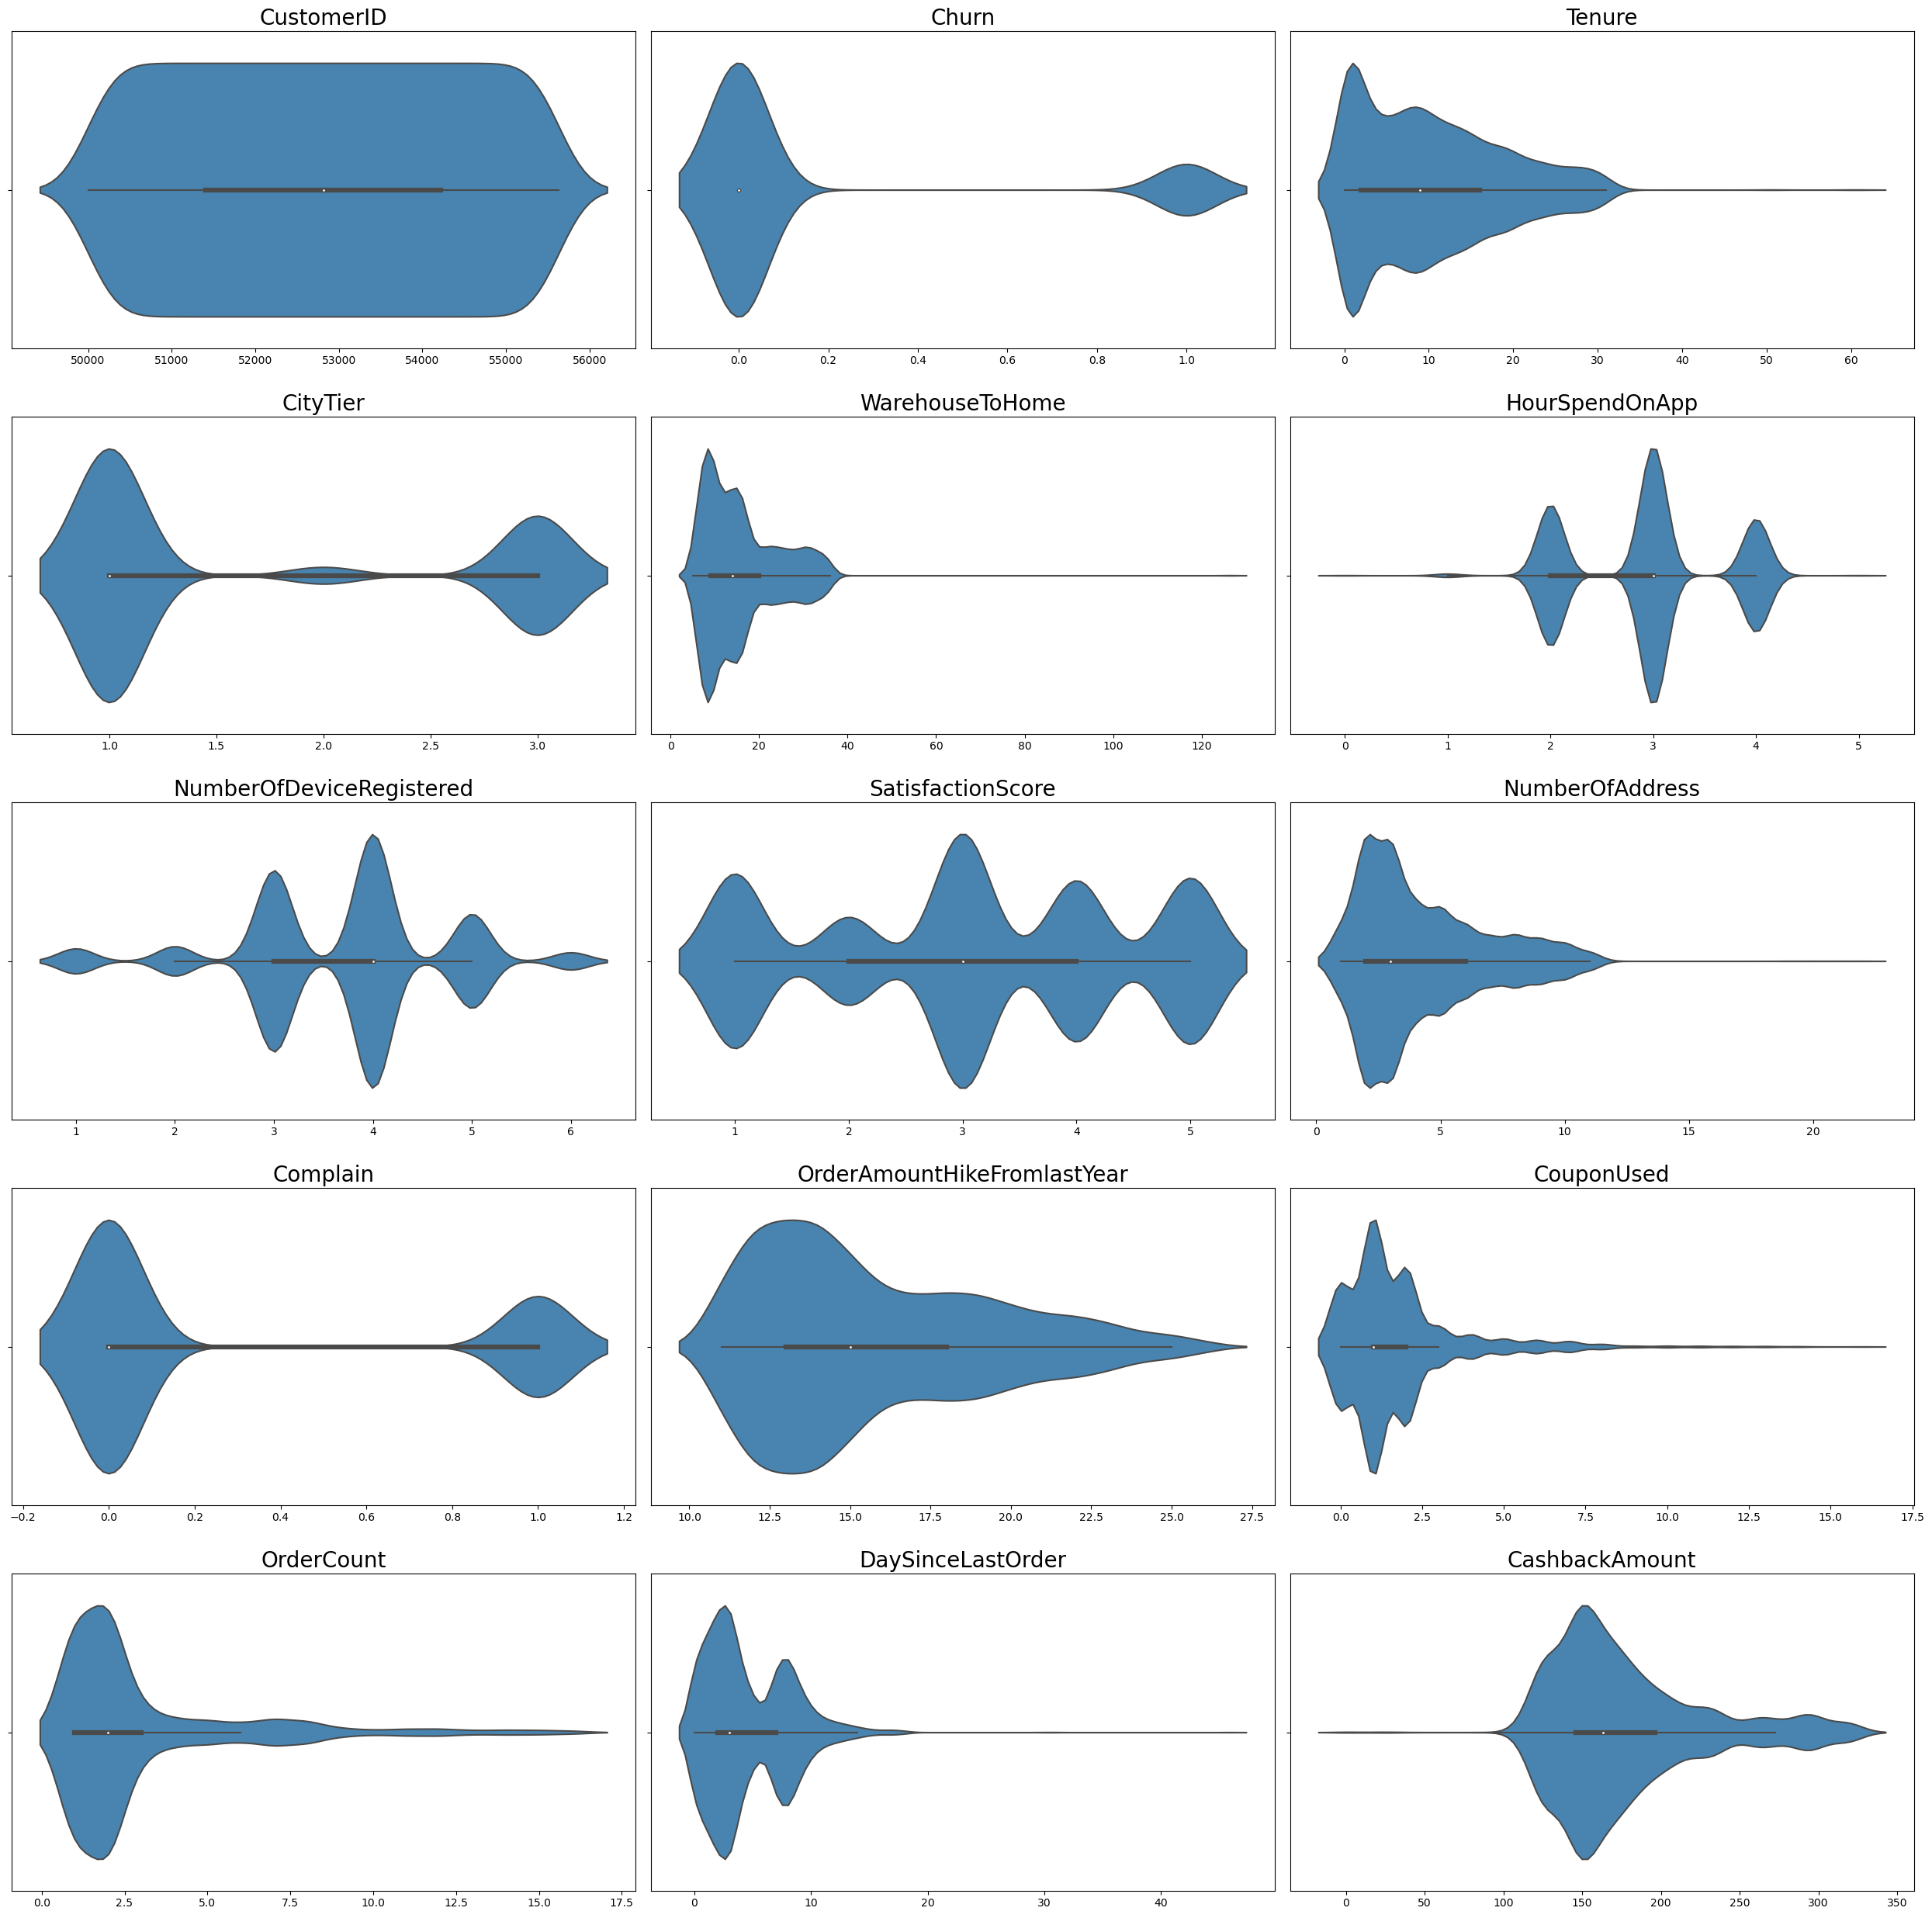

In [41]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(5,3,i+1)
    sns.violinplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Countplot

In [42]:
len(cat)

5

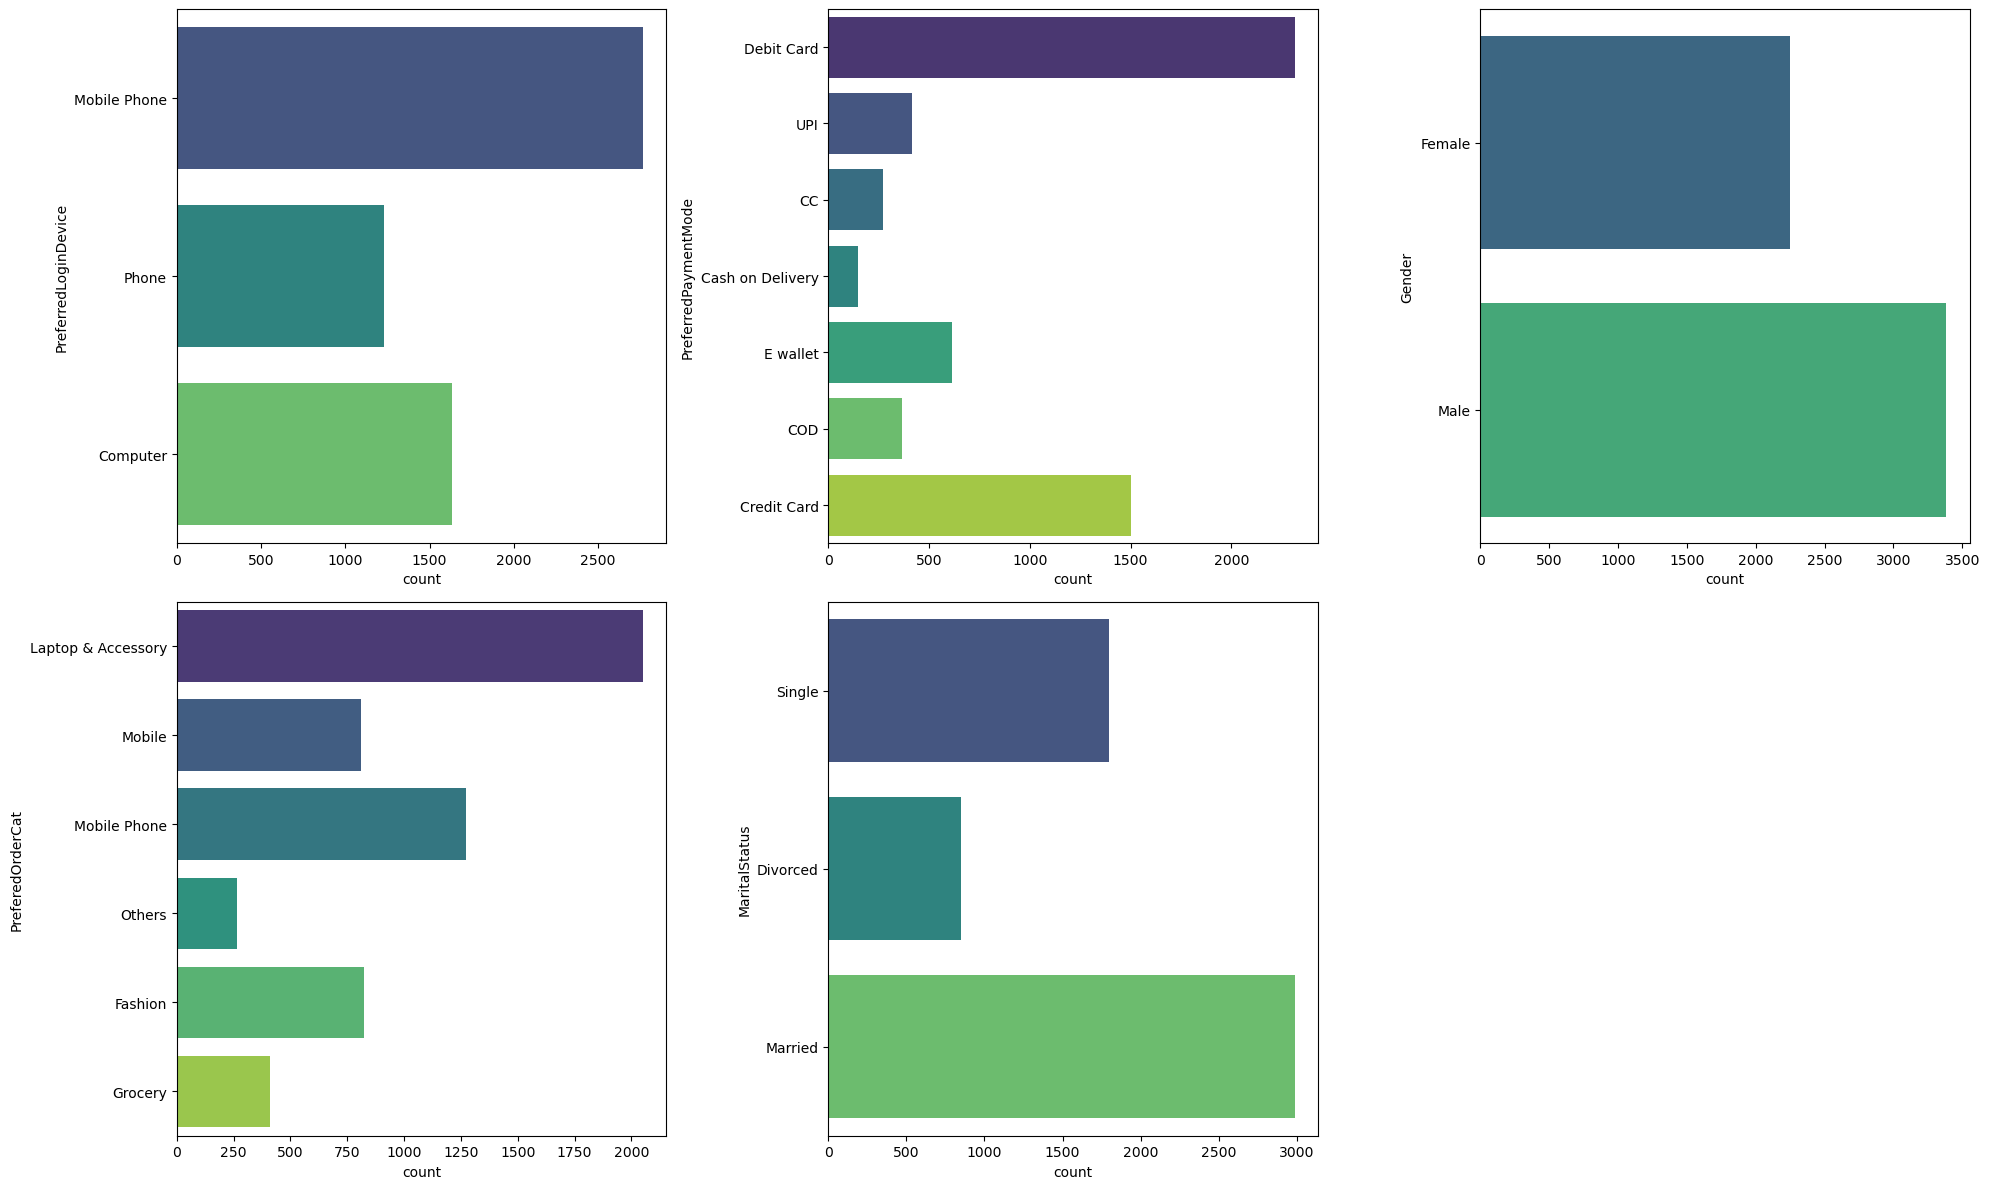

In [49]:
fig, axes = plt.subplots(2,3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1)]

for i in range(len(cat)):
    sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]])
    axes[1,2].axis('off')
    plt.tight_layout() 

## Bivariate Analysis

### Numerical Feature Analysis

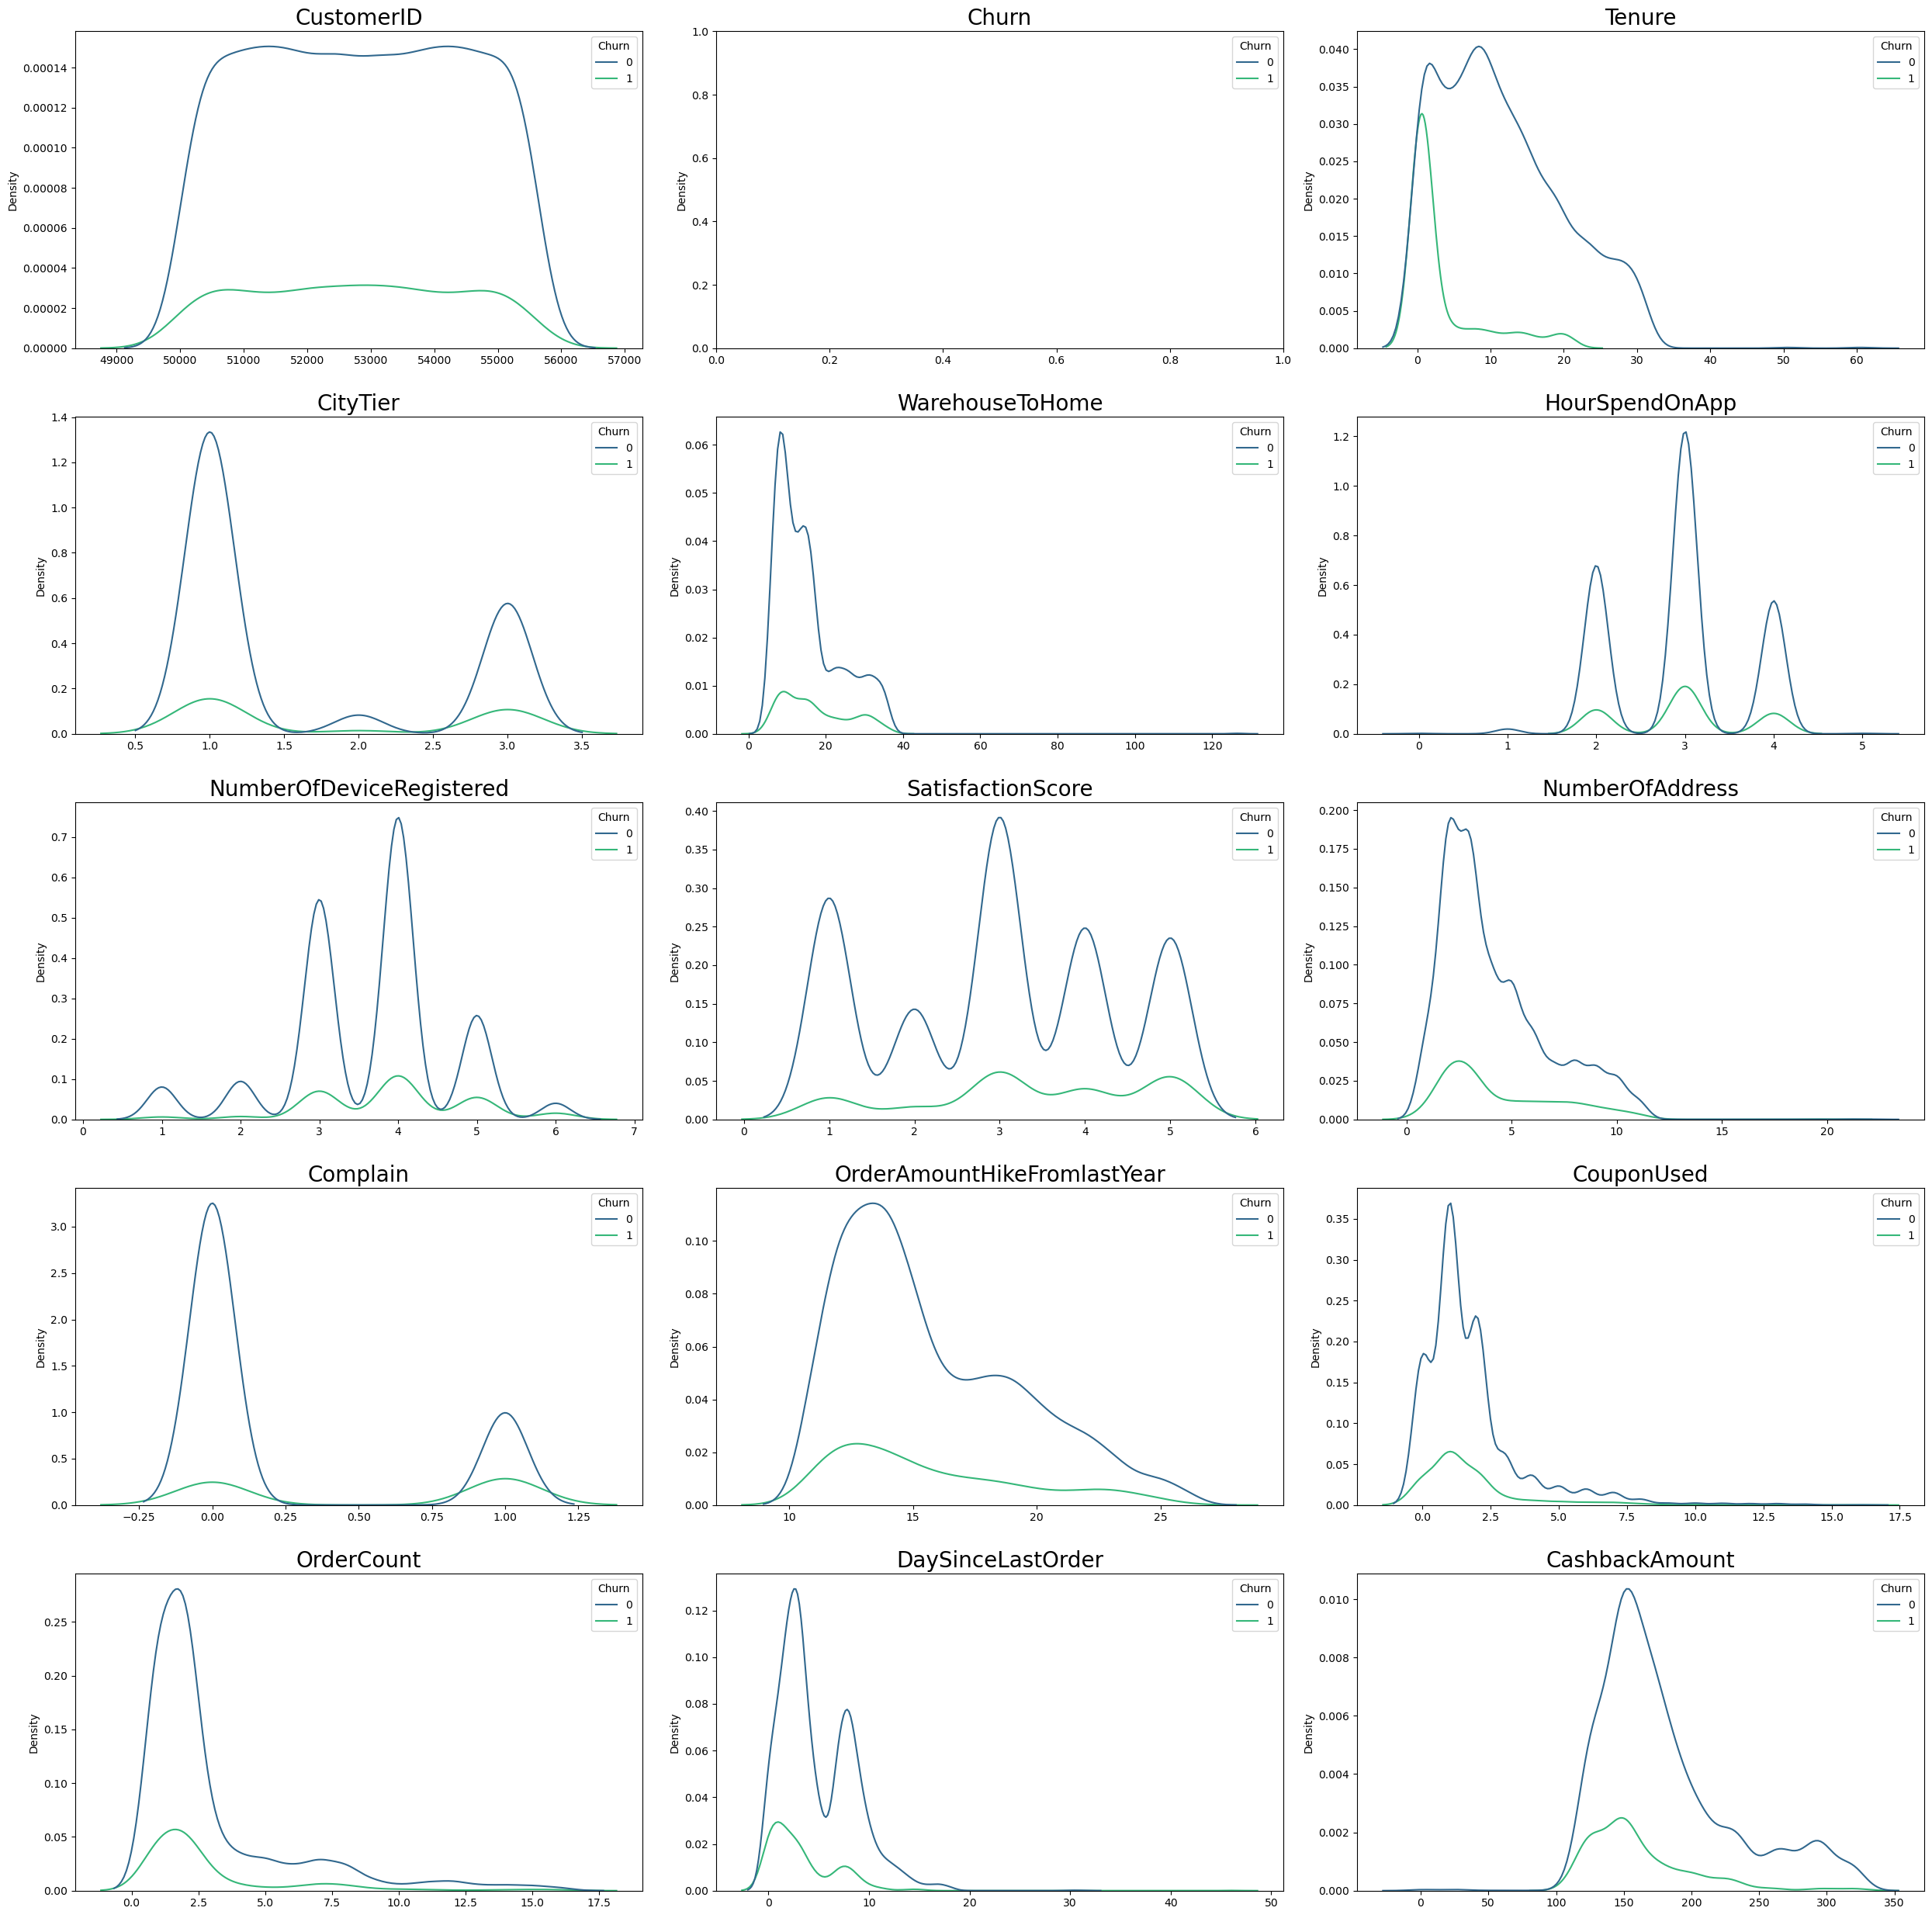

In [50]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', hue=eda['Churn'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Categorical Feature Analysis

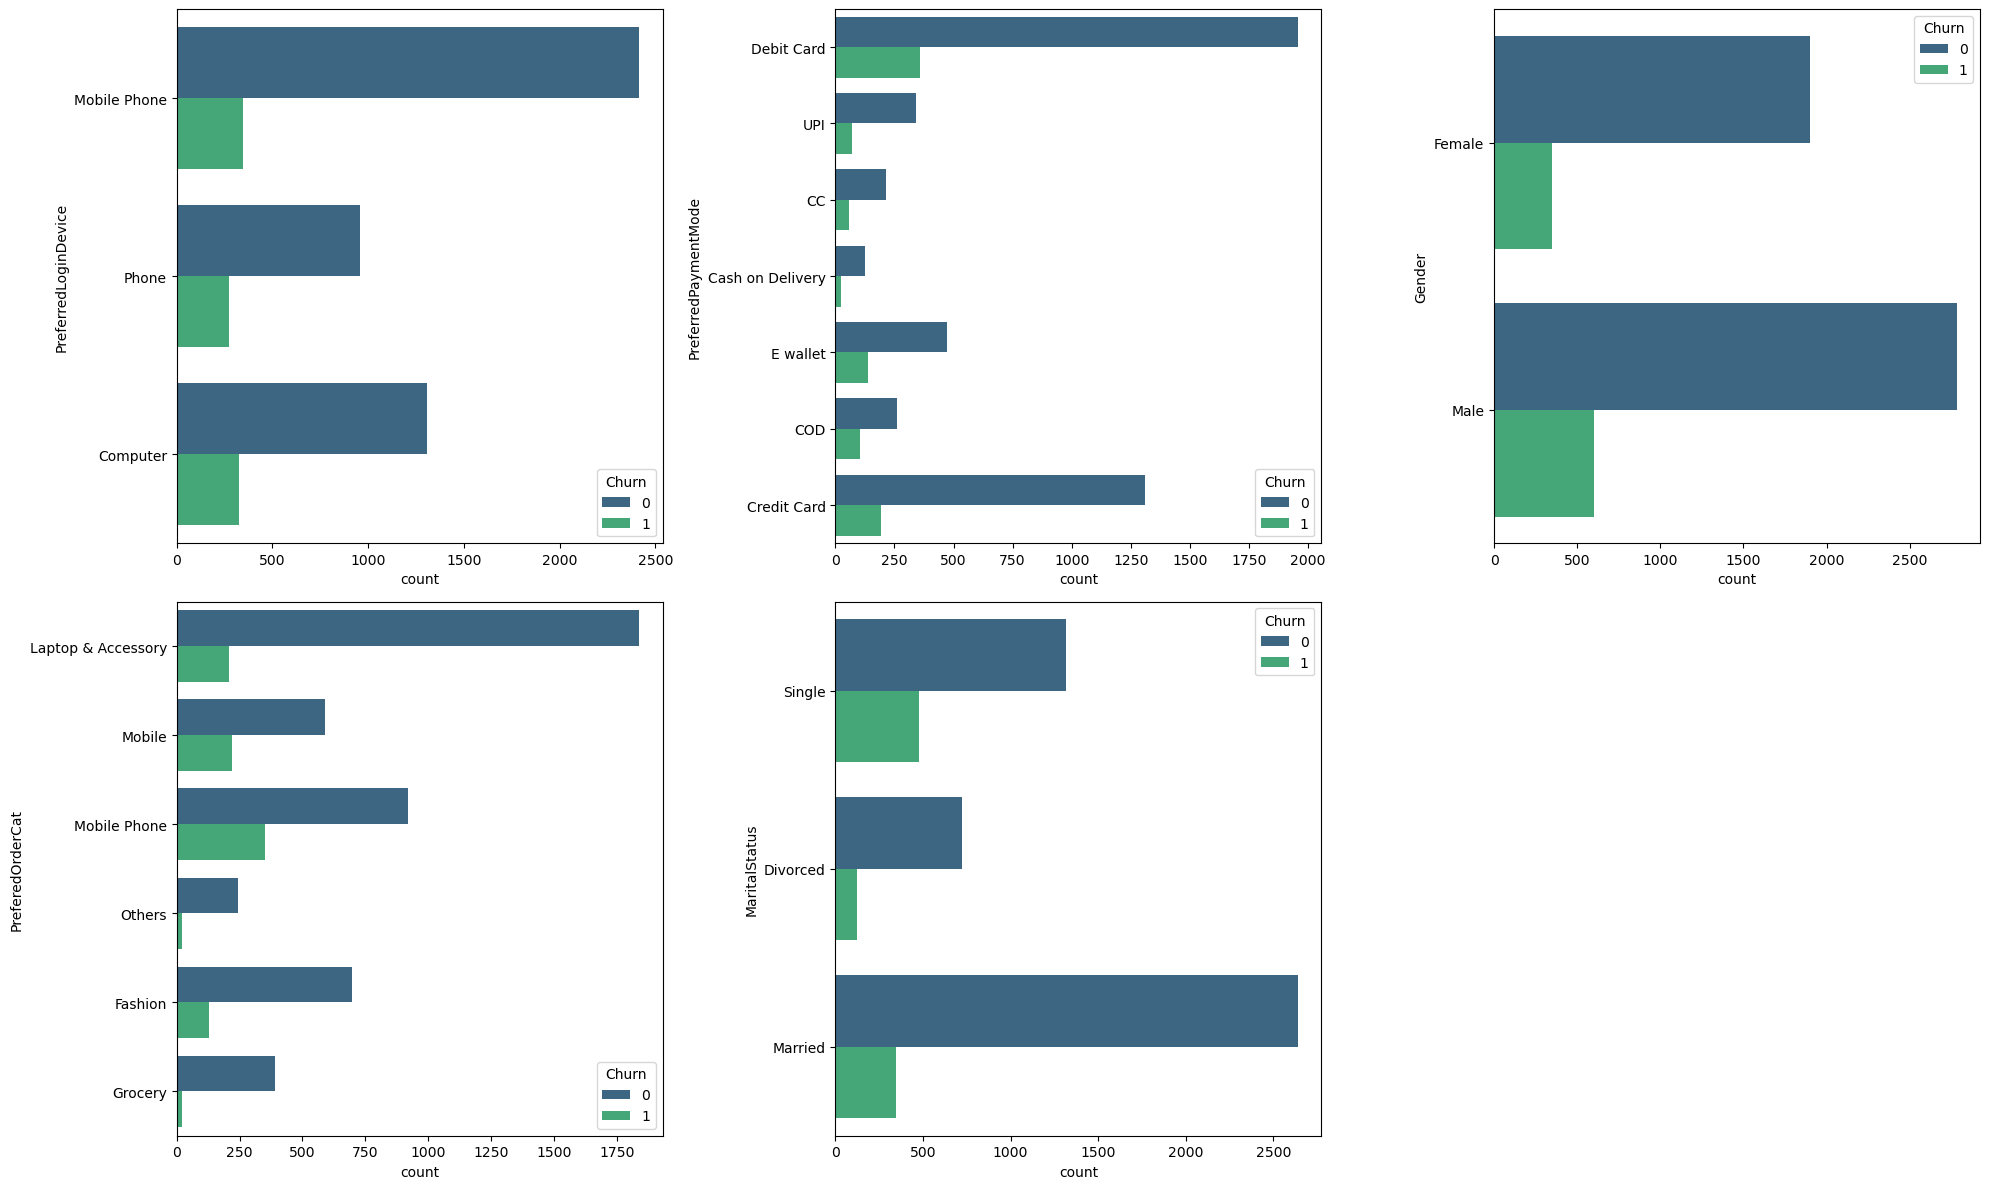

In [51]:
fig, axes = plt.subplots(2,3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1)]

for i in range(len(cat)):
    sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], hue=eda['Churn'])
    axes[1,2].axis('off')
    plt.tight_layout() 

## Multivariate Analysis

<AxesSubplot:>

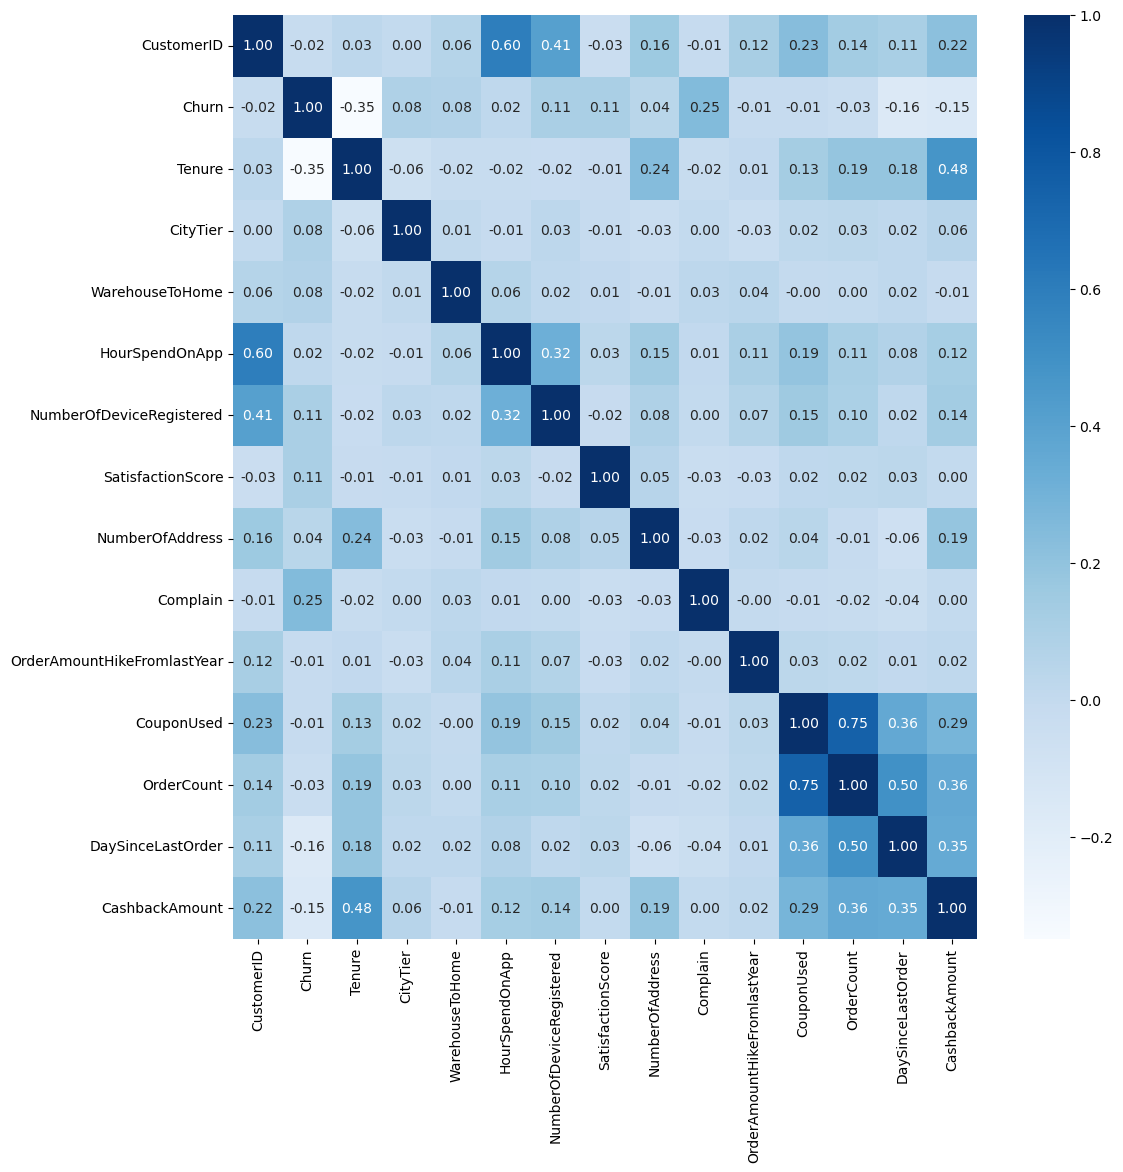

In [52]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(eda.corr(), cmap='Blues', annot=True, fmt='.2f')

<AxesSubplot:>

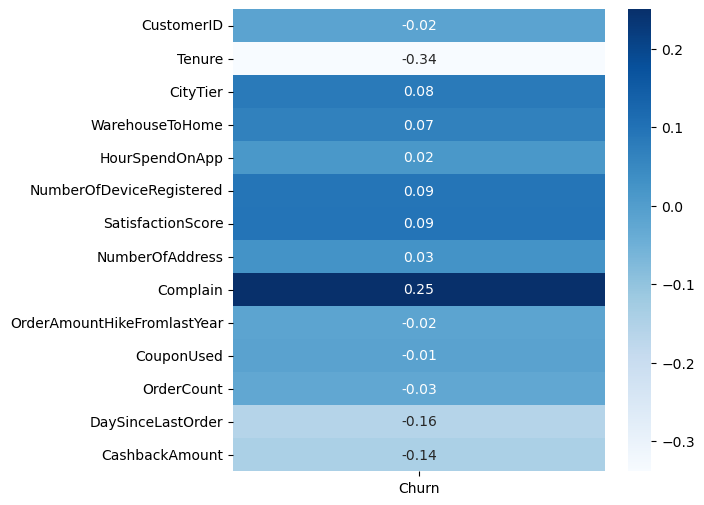

In [53]:
# Create Heatmap Correlation Chart for Each Numerical to Target Features
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(method = 'kendall')[data.corr(method = 'kendall').index != 'Churn'][['Churn']], cmap='Blues', annot=True, fmt='.2f')

# Data Preprocessing

In [24]:
# copy data for processing
df = data.copy()

## Handling Missing Values

In [5]:
# check missing values in percentage
df.isnull().sum()/len(df)*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

because only 5% or less missing values, we will impute all the missing values according by the features

In [25]:
# We will impute Tenure, CouponUsed, and DaySinceLastOrder by min values (0)
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].min())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].min())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].min())

# We will impute WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, and OrderCount by its median values
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())

In [26]:
# check missing values in percentage
df.isnull().sum()/len(df)*100

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

## Handling Duplicate Values

In [62]:
df.duplicated().sum()

0

this data contains no duplicate values

## Feature Engineering

In [27]:
# devide category and numeric
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(exclude='object').columns

In [28]:
df[cat].head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


### PreferredLoginDevice

In [65]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [29]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

### PreferredPaymentMode

In [67]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [30]:
df['PreferredPaymentMode'] = np.where(df['PreferredPaymentMode'] == 'CC', 'Credit Card',
                             np.where(df['PreferredPaymentMode'] == 'Cash on Delivery', 'COD', df['PreferredPaymentMode']))

df['PreferredPaymentMode'].value_counts()

Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

### PreferedOrderCat

In [69]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [31]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

## Categorical Features Encoding

In [32]:
# One-Hot Encoding

df_cat = pd.get_dummies(df[cat])
df_cat.head()

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1


In [33]:
print('Number of Original Features :', df.shape[1])
print('Number of Encoded Features :', df_cat.shape[1])
print('Number of Cat Features :', df[cat].shape[1])

Number of Original Features : 20
Number of Encoded Features : 17
Number of Cat Features : 5


In [34]:
# Drop Original Cat Features
df = df.drop(cat, axis=1)

# print existing number features
print('Number of Existing Features :', df.shape[1])

Number of Existing Features : 15


In [35]:
# concat encoded with existing features
df_final = pd.concat([df, df_cat], axis=1)
print('Number of Features Final DataFrame :', df_final.shape[1])

Number of Features Final DataFrame : 32


In [36]:
# create copy data
df = pd.concat([df, df_cat], axis=1)
data_final = df.copy()

## Numerical Features Transformation

In [37]:
# Checking Statistical Descriptive for Each Numerical Features

df_final[num[2:]].describe().T['min']

Tenure                          0.0
CityTier                        1.0
WarehouseToHome                 5.0
HourSpendOnApp                  0.0
NumberOfDeviceRegistered        1.0
SatisfactionScore               1.0
NumberOfAddress                 1.0
Complain                        0.0
OrderAmountHikeFromlastYear    11.0
CouponUsed                      0.0
OrderCount                      1.0
DaySinceLastOrder               0.0
CashbackAmount                  0.0
Name: min, dtype: float64

In [38]:
# Replace 0 Value with a Small Value

for i in num[2:]:
    df_final[i].replace(df_final[i].min(), (df_final[df_final[i] > df_final[i].min()][i].min())/10, inplace = True)

In [39]:
# Checking Minimum Value for Each Numerical Features After Replacement

df_final[num[2:]].describe().T[['min']]

,min
Tenure,0.1
CityTier,0.2
WarehouseToHome,0.6
HourSpendOnApp,0.1
NumberOfDeviceRegistered,0.2
SatisfactionScore,0.2
NumberOfAddress,0.2
Complain,0.1
OrderAmountHikeFromlastYear,1.2
CouponUsed,0.1


In [40]:
# Transforming Right Skewed Numerical Data to More Normally Distributed

for i in num[2:]:
    df_final[i] = np.log(df_final[i])

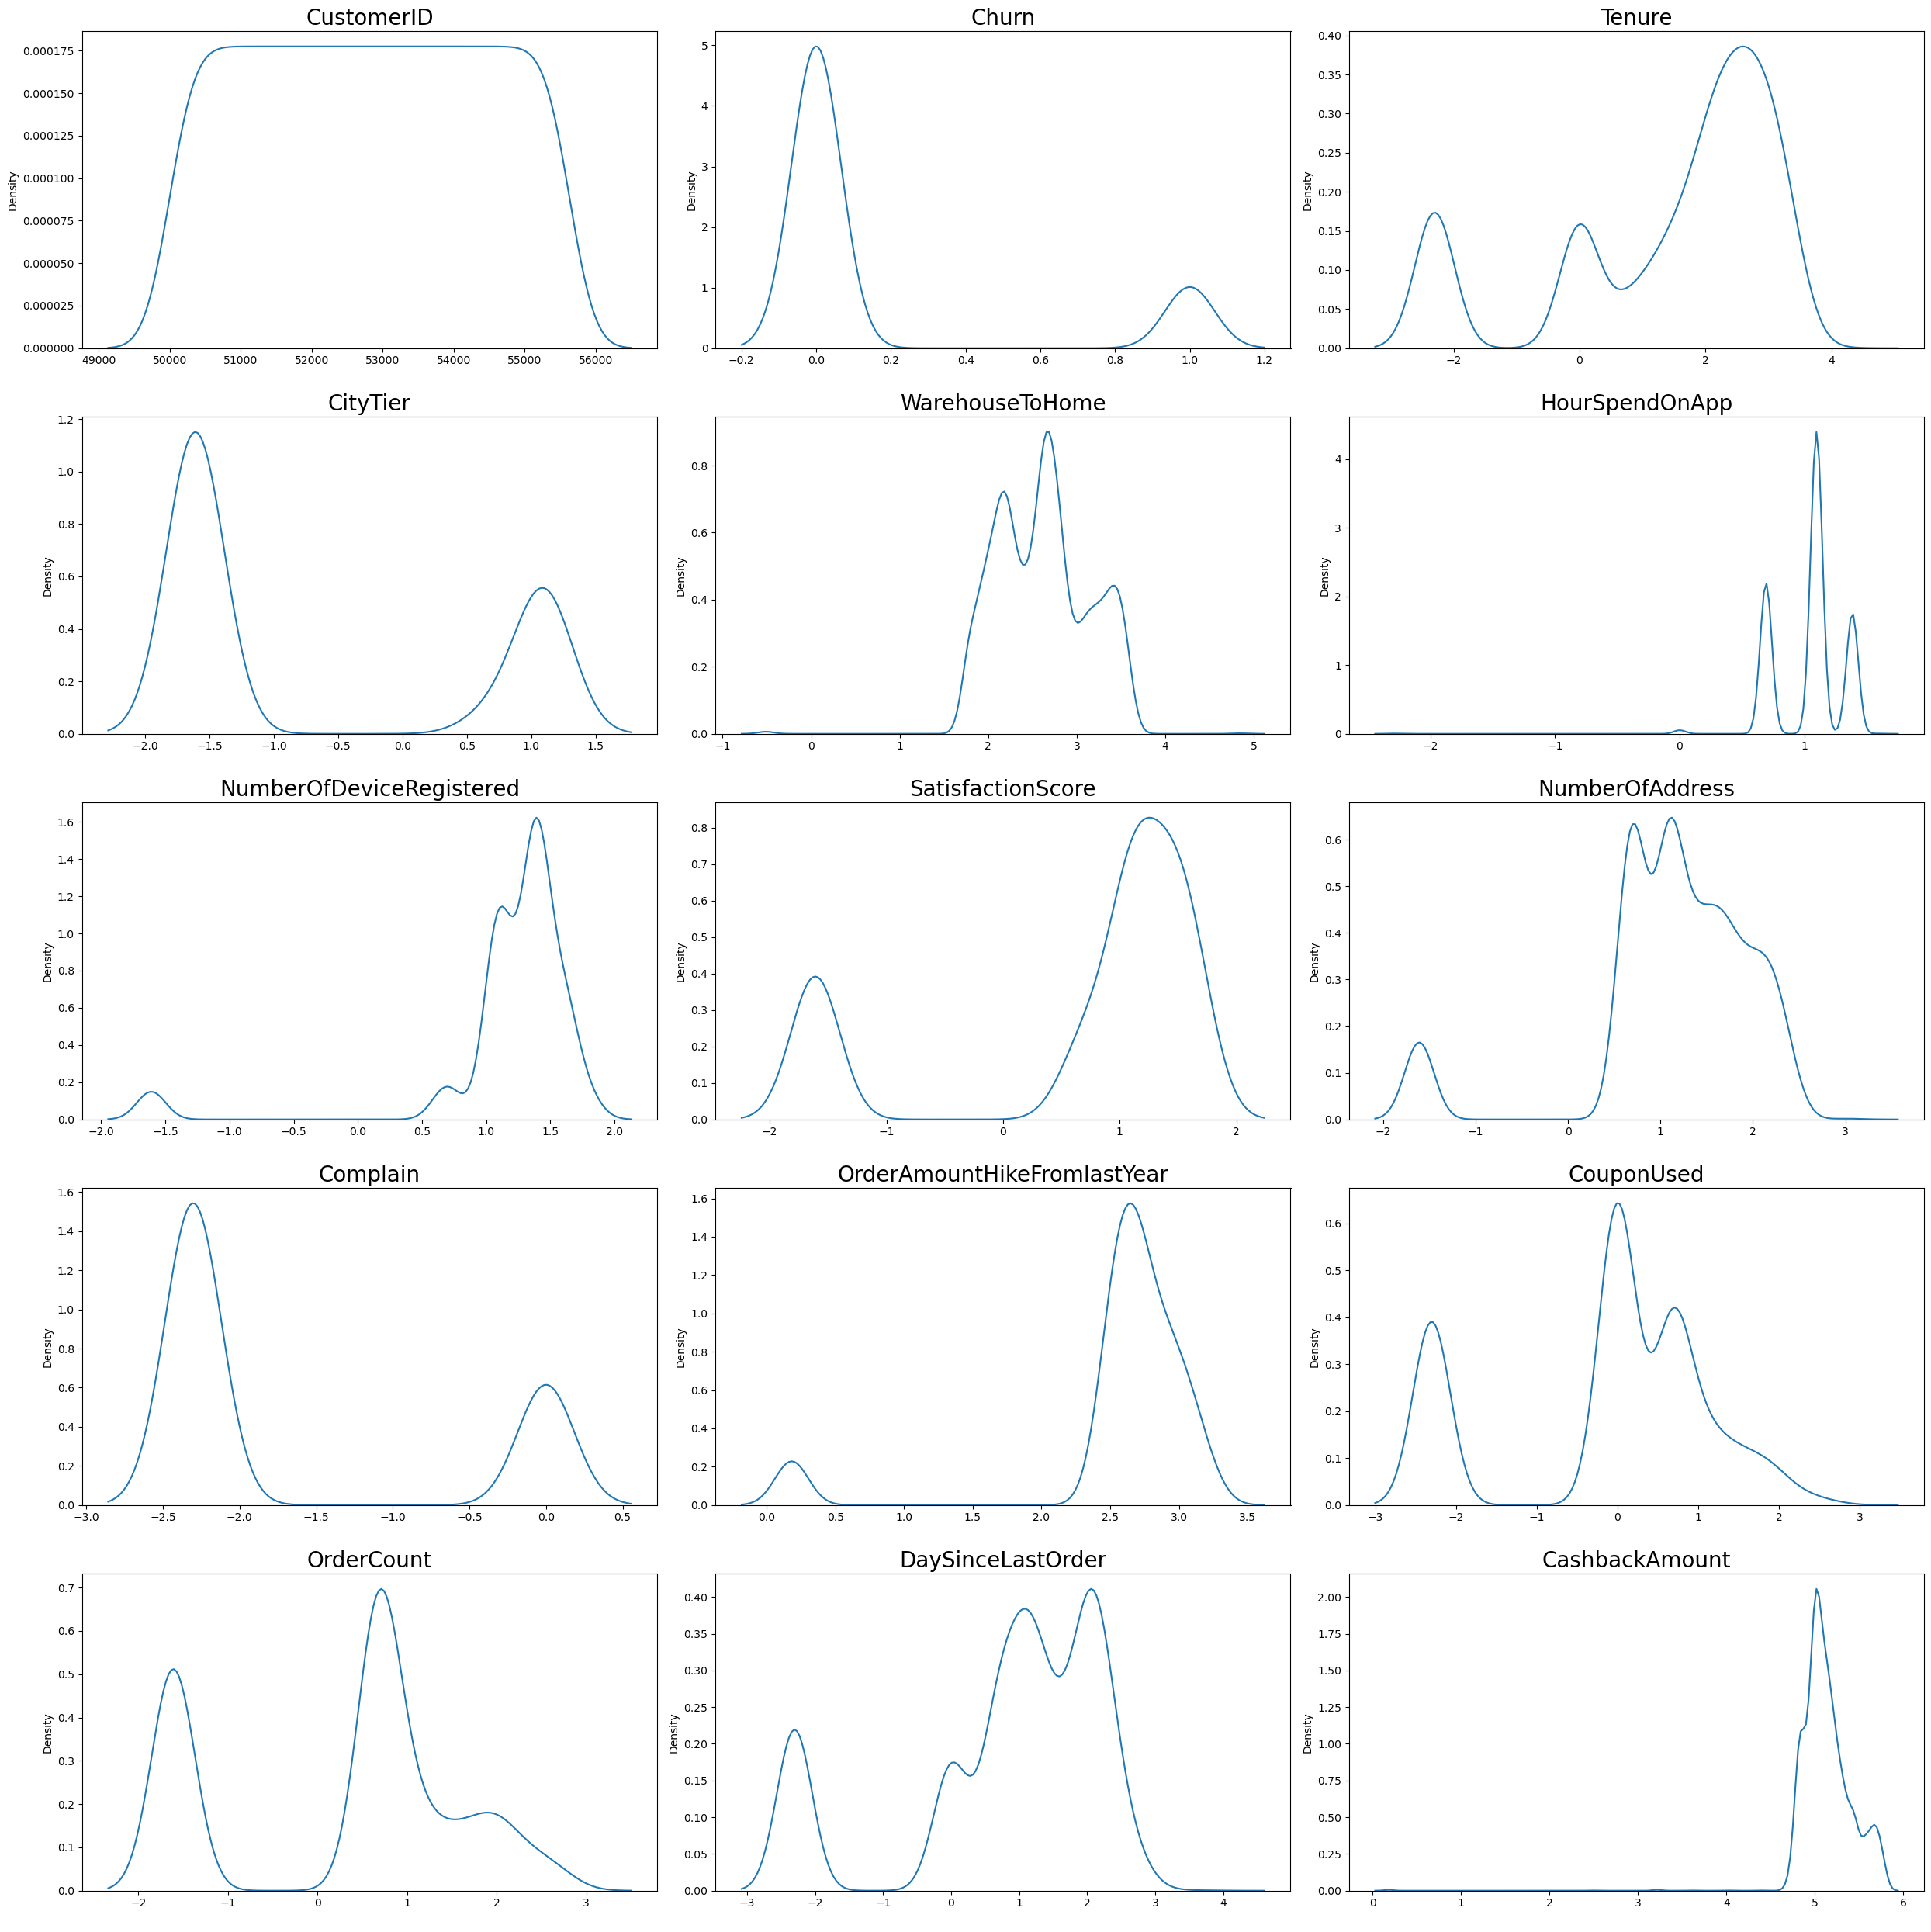

In [87]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_final[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

In [108]:
# check descriptive statistic
df_final[num[2:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,1.425016,1.774485,-2.302585,0.000000,2.079442,2.708050,4.110874
CityTier,5630.0,-0.682175,1.269415,-1.609438,-1.609438,-1.609438,1.098612,1.098612
WarehouseToHome,5630.0,2.613763,0.513545,-0.510826,2.197225,2.639057,2.995732,4.844187
HourSpendOnApp,5630.0,1.044394,0.266686,-2.302585,0.693147,1.098612,1.098612,1.609438
NumberOfDeviceRegistered,5630.0,1.187040,0.629299,-1.609438,1.098612,1.386294,1.386294,1.791759
SatisfactionScore,5630.0,0.651932,1.183717,-1.609438,0.693147,1.098612,1.386294,1.609438
NumberOfAddress,5630.0,1.149863,0.895622,-1.609438,0.693147,1.098612,1.791759,3.091042
Complain,5630.0,-1.646573,1.039405,-2.302585,-2.302585,-2.302585,0.000000,0.000000
OrderAmountHikeFromlastYear,5630.0,2.573716,0.682797,0.182322,2.564949,2.708050,2.890372,3.258097
CouponUsed,5630.0,-0.110819,1.313391,-2.302585,0.000000,0.000000,0.693147,2.772589


## Outlier Handling

In [41]:
outlier_col = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'CouponUsed', 'DaySinceLastOrder']

In [42]:
from scipy import stats
import numpy as np

# Handling Outlier using Z-score

print(f'Total Rows Before Outlier Handling = {len(df_final)}')

filtered_entries = np.array([True] * len(df_final))

for col in outlier_col:
    zscore = abs(stats.zscore(df_final[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df_final = df_final[filtered_entries] 

print(f'Total Rows After Outlier Handling = {len(df_final)}')

Total Rows Before Outlier Handling = 5630
Total Rows After Outlier Handling = 5250


In [43]:
# check descriptive statistic
df_final[num[2:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5250.0,1.468398,1.744369,-2.302585,0.000000,2.079442,2.772589,4.110874
CityTier,5250.0,-0.689108,1.267538,-1.609438,-1.609438,-1.609438,1.098612,1.098612
WarehouseToHome,5250.0,2.624128,0.497320,1.791759,2.197225,2.639057,2.995732,3.583519
HourSpendOnApp,5250.0,1.056090,0.265348,-2.302585,0.693147,1.098612,1.098612,1.609438
NumberOfDeviceRegistered,5250.0,1.204916,0.607232,-1.609438,1.098612,1.386294,1.386294,1.791759
SatisfactionScore,5250.0,0.652990,1.183819,-1.609438,0.693147,1.098612,1.386294,1.609438
NumberOfAddress,5250.0,1.344648,0.532561,0.693147,0.693147,1.098612,1.791759,3.091042
Complain,5250.0,-1.644704,1.040301,-2.302585,-2.302585,-2.302585,0.000000,0.000000
OrderAmountHikeFromlastYear,5250.0,2.585360,0.664014,0.182322,2.564949,2.708050,2.890372,3.258097
CouponUsed,5250.0,-0.067716,1.292585,-2.302585,0.000000,0.000000,0.693147,2.772589


## Numerical Feature Scaling

In [44]:
# Import Robust Scaler Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting Data Train - Test
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('Churn', axis=1),
                                                    df_final['Churn'],
                                                    test_size=0.3,
                                                    random_state=123)

print(f'Total Train Data = {X_train.shape[0]}')
print(f'Total Test Data = {X_test.shape[0]}')

Total Train Data = 3675
Total Test Data = 1575


In [45]:
scaler = MinMaxScaler()

# Fitting Scaler with Train Data
scaler.fit(X_train)

# Scaling Train and Test Data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Create DataFrame from Scaled Array Values

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
# print shape
print('X_train Shape :', X_train.shape)
print('X_test Shape :', X_test.shape)
print('X_train_scaled Shape :', X_train_scaled.shape)
print('X_test_scaled Shape :', X_test_scaled.shape)
print('y_train Shape :', y_train.shape)
print('y_test Shape :', y_test.shape)

X_train Shape : (3675, 31)
X_test Shape : (1575, 31)
X_train_scaled Shape : (3675, 31)
X_test_scaled Shape : (1575, 31)
y_train Shape : (3675,)
y_test Shape : (1575,)


## Handling Imbalanced Target

In [127]:
df_final['Churn'].value_counts()/len(df_final)*100

0    82.819048
1    17.180952
Name: Churn, dtype: float64

In [48]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train_scaled, y_train)
X_smote, y_smote = sm.fit_resample(X_train_scaled, y_train)

In [49]:
# Lets Check the Class Distribution
y_smote.value_counts()

0    3057
1    3057
Name: Churn, dtype: int64

# Modeling

In [50]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, fbeta_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, make_scorer

## Basic Modeling

In [127]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test_scaled)
y_pred_dt_sm = dt_sm.predict(X_test_scaled)
y_pred_rf_sm = rf_sm.predict(X_test_scaled)
y_pred_ab_sm = lr_sm.predict(X_test_scaled)
y_pred_gb_sm = gb_sm.predict(X_test_scaled)
y_pred_xg_sm = xg_sm.predict(X_test_scaled)

[00:21:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [154]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df_score

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.810159,0.484277,0.813380,0.607096,0.834398
1,Decision Tree,0.897143,0.698052,0.757042,0.726351,0.931426
2,Random Forest,0.939683,0.882591,0.767606,0.821092,0.971965
3,Ada Boost,0.810159,0.484277,0.813380,0.607096,0.834398
4,Gradient Boost,0.893333,0.695946,0.725352,0.710345,0.932019
5,XG Boost,0.945397,0.905738,0.778169,0.837121,0.932019


## Hyperparameter

In [146]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Decision Tree

In [166]:
params = {'max_depth': [int(x) for x in np.linspace(start=1, stop=31, num=20)],
          'min_samples_split': [int(x) for x in np.linspace(start=2, stop=100, num=15)],
          'min_samples_leaf' : [int(x) for x in np.linspace(start=1, stop=40, num=10)],
          'random_state': [123]}

In [167]:
f2_scorer = make_scorer(fbeta_score, pos_label=0, beta=2)
dt = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring=f2_scorer)
dt.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 5, 7, 8, 10, 12, 13, 15, 16, 18,
                                       19, 21, 23, 24, 26, 27, 29, 31],
                         'min_samples_leaf': [1, 5, 9, 14, 18, 22, 27, 31, 35,
                                              40],
                         'min_samples_split': [2, 9, 16, 23, 30, 37, 44, 51, 58,
                                               65, 72, 79, 86, 93, 100],
                         'random_state': [123]},
             scoring=make_scorer(fbeta_score, pos_label=0, beta=2))

In [168]:
print(dt.best_params_)

{'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 123}


In [170]:
best_params = dt.best_params_
dt_tuned = DecisionTreeClassifier(**best_params)
dt_tuned.fit(X_smote,y_smote)

DecisionTreeClassifier(max_depth=16, random_state=123)

In [182]:
y_train_pred = dt_tuned.predict(X_train_scaled)
y_test_pred = dt_tuned.predict(X_test_scaled)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
F2 Score: 0.999
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3057
           1       0.99      1.00      1.00       618

    accuracy                           1.00      3675
   macro avg       1.00      1.00      1.00      3675
weighted avg       1.00      1.00      1.00      3675

Confussion Matrix ------------------------------------
[[3053    4]
 [   1  617]]


TESTING RESULT:
F2 Score: 0.939
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1291
           1       0.72      0.76      0.74       284

    accuracy                           0.90      1575
   macro avg       0.84      0.85      0.84      1575
weighted avg       0.91      0.90      0.91      1575

Confussion Matrix ------------------------------------
[[1209   82]
 [  68  216]]


### Random Forest

max_depth: 1; train: 0.8560128703579567; test: 0.8436507936507935
max_depth: 2; train: 0.8620343743730354; test: 0.8510132995566815
max_depth: 3; train: 0.8744409585474935; test: 0.8575949367088609
max_depth: 4; train: 0.8889849674072103; test: 0.8697366346002209
max_depth: 5; train: 0.9083079369285809; test: 0.8890458254865035
max_depth: 6; train: 0.926623076415032; test: 0.9028321076513847
max_depth: 7; train: 0.943408656696752; test: 0.9178743961352658
max_depth: 8; train: 0.9606413036336158; test: 0.928660242461921
max_depth: 9; train: 0.9727231001245821; test: 0.9388071262587142
max_depth: 10; train: 0.9860538204674916; test: 0.946594427244582
max_depth: 11; train: 0.9923414282908948; test: 0.9519022579647386
max_depth: 12; train: 0.9963353183692166; test: 0.9577095230745486
max_depth: 13; train: 0.9996728819103696; test: 0.9647095083988287
max_depth: 14; train: 0.9999345806620438; test: 0.9696549599507086
max_depth: 15; train: 1.0; test: 0.9714946070878275
max_depth: 16; train: 1

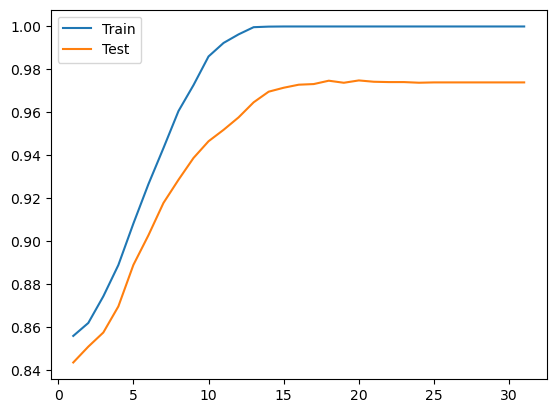

In [174]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 15; train: 1.0; test: 0.9714946070878275

criterion: gini; train: 1.0; test: 0.9714946070878275
criterion: entropy; train: 0.9999345806620438; test: 0.9713669950738916


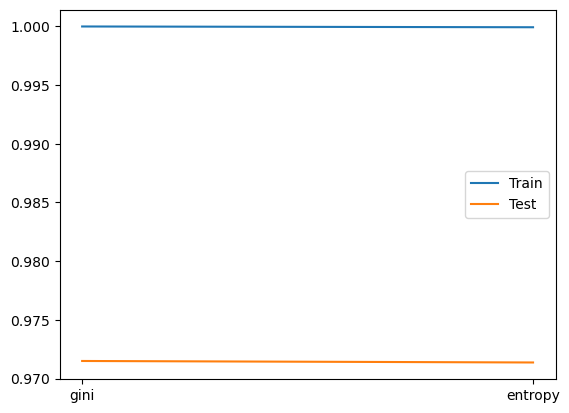

In [176]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                             random_state=123,
                                             criterion=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('criterion: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`criterion`: entropy; train: 0.9999345806620438; test: 0.9713669950738916

n_estimators: 100; train: 0.9999345806620438; test: 0.9713669950738916
n_estimators: 105; train: 0.9999345806620438; test: 0.9707467282525017
n_estimators: 110; train: 0.9999345806620438; test: 0.9715165511932257
n_estimators: 115; train: 0.9999345806620438; test: 0.9710457415678423
n_estimators: 121; train: 0.9999345806620438; test: 0.9711953173136167
n_estimators: 126; train: 0.9999345806620438; test: 0.970597290640394
n_estimators: 131; train: 0.9999345806620438; test: 0.9707467282525017
n_estimators: 136; train: 0.9999345806620438; test: 0.9696549599507086
n_estimators: 142; train: 0.9999345806620438; test: 0.9712174849930737
n_estimators: 147; train: 0.9999345806620438; test: 0.9707467282525017
n_estimators: 152; train: 0.9999345806620438; test: 0.9707467282525017
n_estimators: 157; train: 0.9999345806620438; test: 0.9713669950738916
n_estimators: 163; train: 0.9999345806620438; test: 0.9727566569185776
n_estimators: 168; train: 0.9999345806620438; test: 0.9724573011232497
n_estim

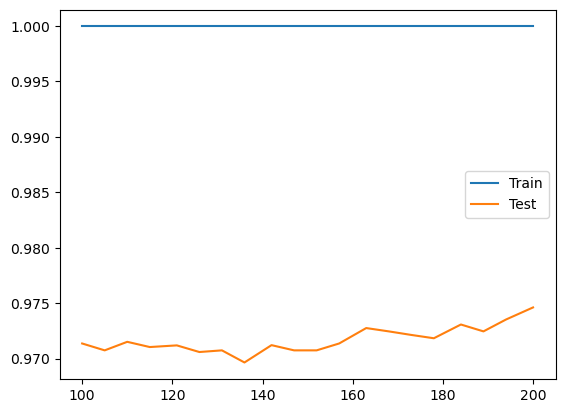

In [178]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
values = [int(x) for x in np.linspace(start = 100, stop = 200, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                             random_state=123,
                                             criterion='entropy',
                                             n_estimators=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`n_estimators`: 200; train: 0.9999345806620438; test: 0.9746153846153846

max_features: auto; train: 0.9999345806620438; test: 0.9746153846153846
max_features: sqrt; train: 0.9999345806620438; test: 0.9746153846153846
max_features: log2; train: 0.9999345806620438; test: 0.9727566569185776


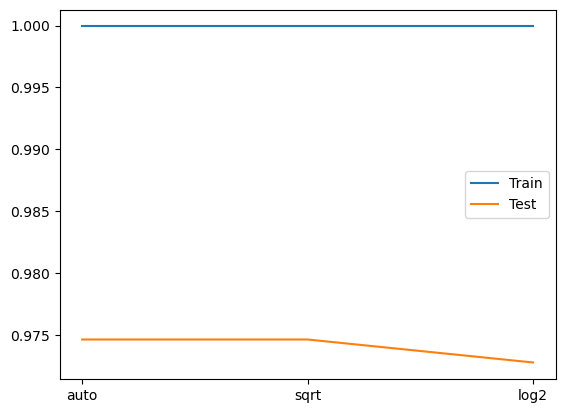

In [51]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 200, num = 20)] # n_estimators
values = ['auto', 'sqrt', 'log2'] # max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                             random_state=123,
                                             criterion='entropy',
                                             n_estimators=200,
                                             max_features=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_features: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [52]:
y_train_pred_rf = model_rf_tunned.predict(X_train_scaled)
y_test_pred_rf = model_rf_tunned.predict(X_test_scaled)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3057
           1       1.00      1.00      1.00       618

    accuracy                           1.00      3675
   macro avg       1.00      1.00      1.00      3675
weighted avg       1.00      1.00      1.00      3675

Confussion Matrix ------------------------------------
[[3057    0]
 [   1  617]]


TESTING RESULT:
F2 Score: 0.973
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1291
           1       0.89      0.76      0.82       284

    accuracy                           0.94      1575
   macro avg       0.92      0.87      0.89      1575
weighted avg       0.94      0.94      0.94      1575

Confussion Matrix ------------------------------------
[[1264   27]
 [  69  215]]


<AxesSubplot:>

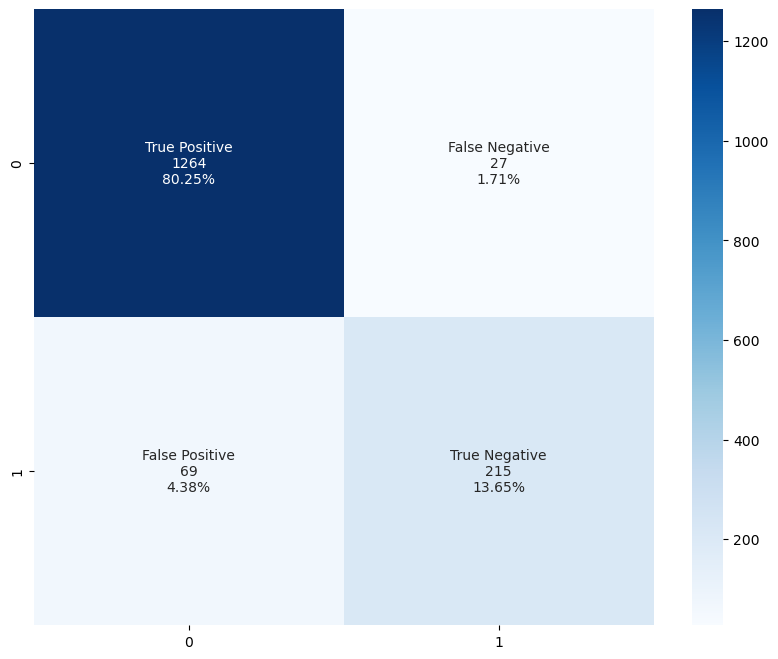

In [53]:
y_test_pred_rf = model_rf_tunned.predict(X_test_scaled)
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Feature Importance

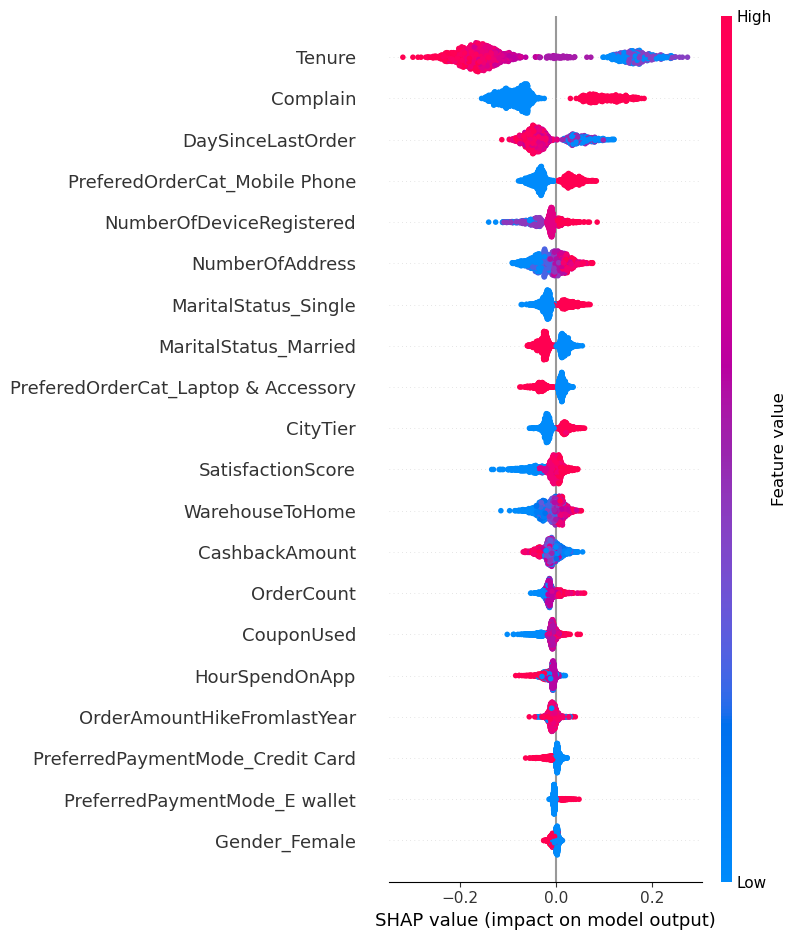

In [187]:
import shap
explainer = shap.TreeExplainer(model_rf_tunned)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values[1], X_test_scaled)

# Business Simulation

In [62]:
feature_importance =  ['Tenure', 'Complain', 'DaySinceLastOrder', 'PreferedOrderCat_Mobile Phone',
                       'NumberOfDeviceRegistered', 'NumberOfAddress', 'MaritalStatus_Single', 
                       'MaritalStatus_Married']

In [67]:
X_smote.columns

Index(['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [63]:
simulation_features = ['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single']

In [64]:
    # We will impute Tenure, CouponUsed, and DaySinceLastOrder by min values (0)
    df['Tenure'] = df['Tenure'].fillna(df['Tenure'].min())
    df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].min())
    df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].min())

    # We will impute WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, and OrderCount by its median values
    df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
    df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
    df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
    df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())

## Sensitifity Function

In [69]:
# Create Simulation Function

def simulation(feature):
    # Define TP FN FP TN var
    tp, fn, fp, tn = cf_matrix.flatten()
    
    # Create Simulation Data
    df_churn = df[df.Churn == 1][simulation_features]
    df_not_churn = df[df.Churn == 0][simulation_features]
  
    cr_list = []
  
    # Create Improvement Experiments
    experiments = np.arange(-1,1.05,0.05)
    experiments[20] = 0
    for i in experiments: 
        df_simulation = pd.concat([df_churn.sample(int(np.ceil(0.1*df_churn.shape[0])), random_state=42), df_not_churn.sample(int(np.ceil(0.1*df_not_churn.shape[0])), random_state=42)]).reset_index(drop=True)
        df_simulation[feature] = df_simulation[feature]*(1+i)
        
        for i in simulation_features:
            if i == 0:
                df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
            elif i == 2:
                df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
            else:
                df_simulation[i] = df_simulation[i].fillna(df_simulation[i].median())
    
        # Predict Simulation Values
        simulation_pred = model_rf_tunned.predict(df_simulation)

        # Adjust Predicted Value to Actual Value
        simulation_pred_pos = simulation_pred[simulation_pred==0]
        simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
        simulation_pred_pos
        simulation_pred_neg = simulation_pred[simulation_pred==1]
        simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
        simulation_pred_neg
        simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
        # Calculate Simulation Conversion Rate
        cr = simulation_pred[simulation_pred==1].size/simulation_pred.size
        cr_list.append(cr)
    
    # Create CR Plot
    # print(cr_list)
    plt.plot(experiments, cr_list, marker='o', linewidth=1)
    plt.ylabel('Churn Rate')
    plt.xlabel(str(feature) + ' Increased')
    plt.title('Churn Rate Increased by ' + str(feature))
    plt.axvline(linewidth=1, color='r', label = 'Current Condition')
    plt.legend()
    plt.show()

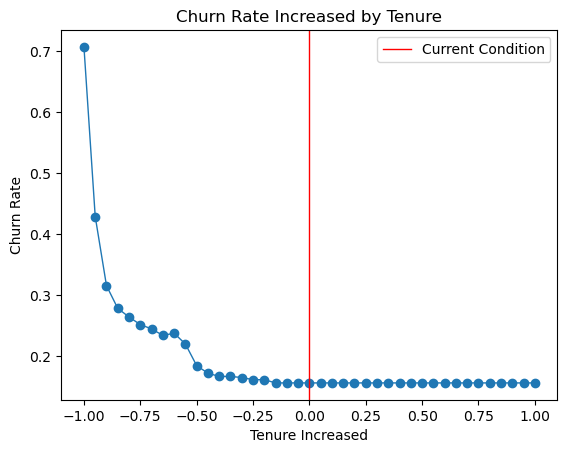

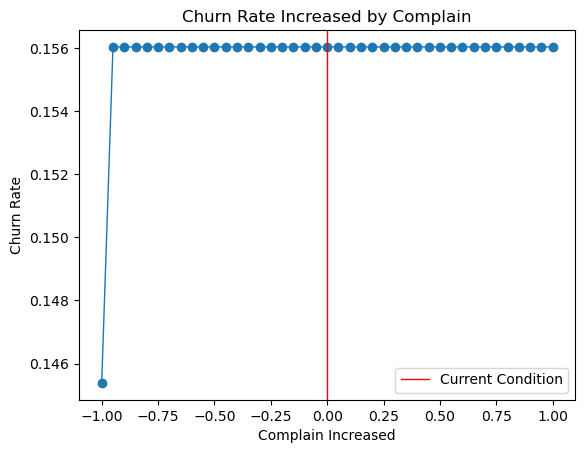

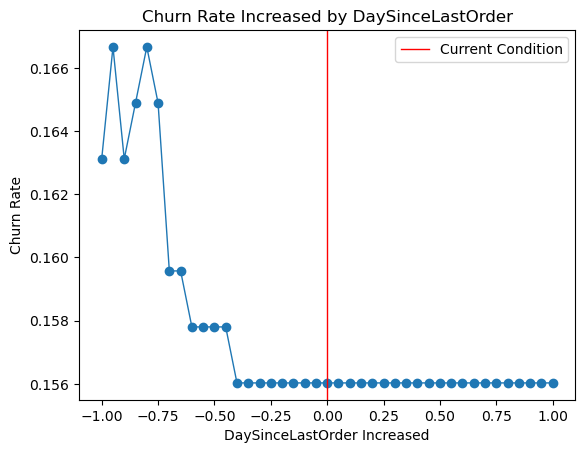

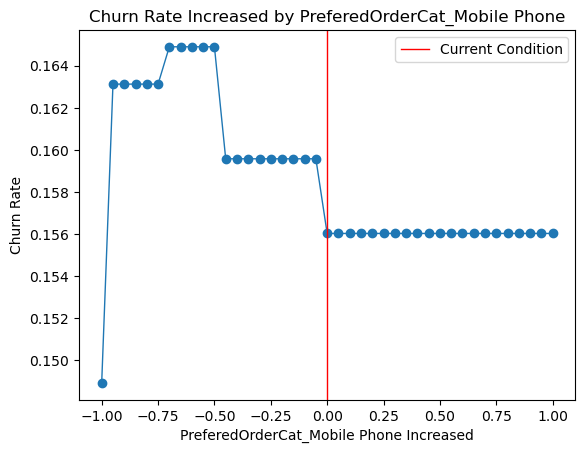

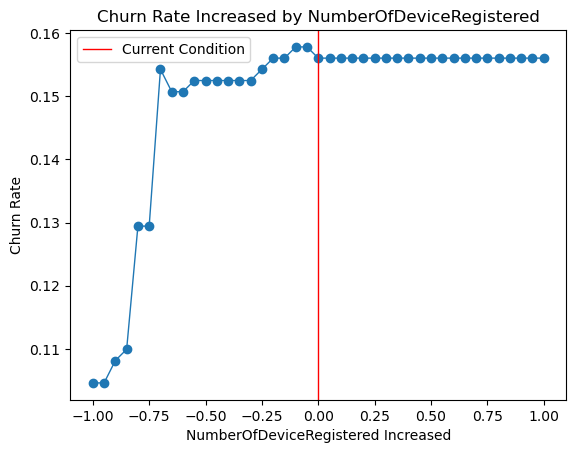

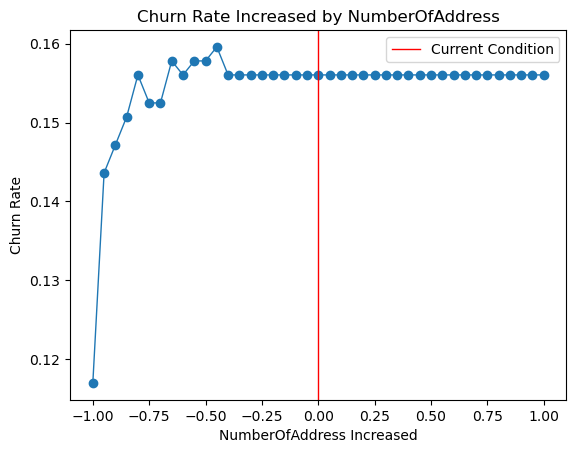

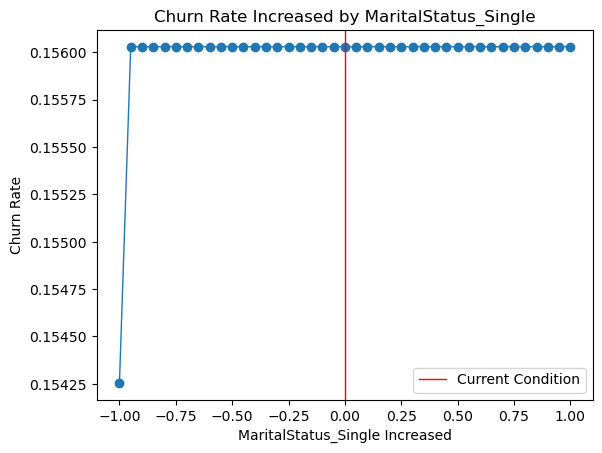

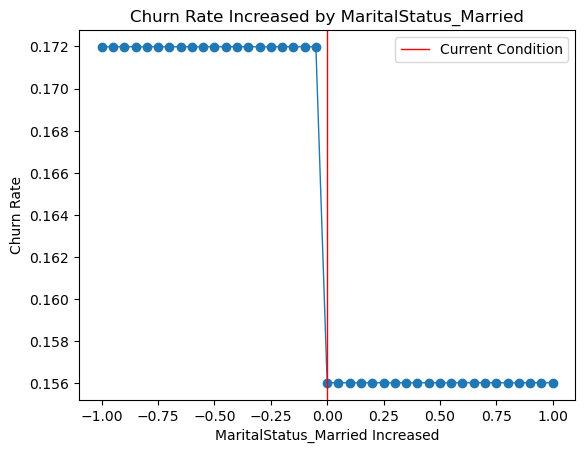

In [119]:
for i in feature_importance:
    simulation(i)

## Combine Simulation  1
Using the same total cashback amount but different alocation <br>
- Decrease 4% CashbackAmount of Non Churn Customers
- Increase 20% CashbackAmount of Churn Customer
- It cost almost the same amount of marketing cost

In [148]:
print('Mean Cashback :', data['CashbackAmount'].sum()/len(data))
print('Data Shape :', data.shape[0])

Mean Cashback : 177.22303019538188
Data Shape : 5630


In [226]:
print('Mean :', data[data['Churn'] == 0]['CashbackAmount'].mean()*0.964)
print('Sum :', data[data['Churn'] == 0]['CashbackAmount'].sum()*0.964)
print('Shape :', data[data['Churn'] == 0].shape[0])

Mean : 174.13233560017073
Sum : 815287.59528
Shape : 4682


In [146]:
print('Mean :', data[data['Churn'] == 1]['CashbackAmount'].mean()*1.2)
print('Sum :', data[data['Churn'] == 1]['CashbackAmount'].sum()*1.2)
print('Shape :', data[data['Churn'] == 1].shape[0])

Mean : 192.44511392405082
Sum : 182437.96800000002
Shape : 948


In [225]:
print('Total New Cashback Amount : ')
(data[data['Churn'] == 1]['CashbackAmount'].sum()*1.2)+(data[data['Churn'] == 0]['CashbackAmount'].sum()*0.964)

Total New Cashback Amount : 


997725.56328

In [186]:
print('Total Old Cashback Amount :', data['CashbackAmount'].sum())

Total Old Cashback Amount : 997765.6599999999


In [228]:
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_churn = df[df.Churn == 1][simulation_features]
df_not_churn = df[df.Churn == 0][simulation_features]
  


# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0

# Create Improvement Experiments
df_churn['CashbackAmount'] = df_churn['CashbackAmount']*0.96
df_not_churn['CashbackAmount'] = df_not_churn['CashbackAmount']*1.2
df_simulation = pd.concat([df_churn.sample(int(np.ceil(0.5*df_churn.shape[0])), random_state=123), df_not_churn.sample(int(np.ceil(0.5*df_not_churn.shape[0])), random_state=123)]).reset_index(drop=True)

for i in simulation_features:
    if i == 0:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    elif i == 2:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    else:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].median())
        
# Predict Simulation Values
simulation_pred = model_rf_tunned.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df.Churn.value_counts()[1]/df.Churn.shape[0]

print(f'Current Churn Rate = {current_cr *100:.2f}%')
print(f'Simulation Churn Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Churn Rate Reduction = ', round((current_cr *100)-(new_cr *100),2))

Current Churn Rate = 16.84%
Simulation Churn Rate After Recommendation = 14.85%
Customer Churn Rate Reduction =  1.99


## Combine Simulation 2

In [213]:
print('Num of Device Registered Before Simulation :', round(data['NumberOfDeviceRegistered'].mean(),0))
print('Num of Device Registered After Simulation :', round(data['NumberOfDeviceRegistered'].mean()*0.7,0))

Num of Device Registered Before Simulation : 4.0
Num of Device Registered After Simulation : 3.0


In [229]:
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_churn = df[df.Churn == 1][simulation_features]
df_not_churn = df[df.Churn == 0][simulation_features]
  


# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0

# Create Improvement Experiments
df_churn['CashbackAmount'] = df_churn['CashbackAmount']*0.96
df_not_churn['CashbackAmount'] = df_not_churn['CashbackAmount']*1.2
df_simulation = pd.concat([df_churn.sample(int(np.ceil(0.5*df_churn.shape[0])), random_state=123), df_not_churn.sample(int(np.ceil(0.5*df_not_churn.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['NumberOfDeviceRegistered'] = df_simulation['NumberOfDeviceRegistered']*0.7

for i in simulation_features:
    if i == 0:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    elif i == 2:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    else:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].median())
        
# Predict Simulation Values
simulation_pred = model_rf_tunned.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df.Churn.value_counts()[1]/df.Churn.shape[0]

print(f'Current Churn Rate = {current_cr *100:.2f}%')
print(f'Simulation Churn Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Churn Rate Reduction = ', round((current_cr *100)-(new_cr *100),2))

Current Churn Rate = 16.84%
Simulation Churn Rate After Recommendation = 14.39%
Customer Churn Rate Reduction =  2.45


## Combine Simulation 3

In [219]:
print('NumberOfAddress Before Simulation :', round(data['NumberOfAddress'].mean(),0))
print('NumberOfAddress After Simulation :', round(data['NumberOfAddress'].mean()*0.6,0))

NumberOfAddress Before Simulation : 4.0
NumberOfAddress After Simulation : 3.0


In [230]:
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_churn = df[df.Churn == 1][simulation_features]
df_not_churn = df[df.Churn == 0][simulation_features]
  


# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0

# Create Improvement Experiments
df_churn['CashbackAmount'] = df_churn['CashbackAmount']*0.96
df_not_churn['CashbackAmount'] = df_not_churn['CashbackAmount']*1.2
df_simulation = pd.concat([df_churn.sample(int(np.ceil(0.5*df_churn.shape[0])), random_state=123), df_not_churn.sample(int(np.ceil(0.5*df_not_churn.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['NumberOfAddress'] = df_simulation['NumberOfAddress']*0.6

for i in simulation_features:
    if i == 0:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    elif i == 2:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    else:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].median())
        
# Predict Simulation Values
simulation_pred = model_rf_tunned.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df.Churn.value_counts()[1]/df.Churn.shape[0]

print(f'Current Churn Rate = {current_cr *100:.2f}%')
print(f'Simulation Churn Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Churn Rate Reduction = ', round((current_cr *100)-(new_cr *100),2))

Current Churn Rate = 16.84%
Simulation Churn Rate After Recommendation = 14.88%
Customer Churn Rate Reduction =  1.95


## Combine All Simulation

In [231]:
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_churn = df[df.Churn == 1][simulation_features]
df_not_churn = df[df.Churn == 0][simulation_features]
  


# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0

# Create Improvement Experiments
df_churn['CashbackAmount'] = df_churn['CashbackAmount']*0.96
df_not_churn['CashbackAmount'] = df_not_churn['CashbackAmount']*1.2
df_simulation = pd.concat([df_churn.sample(int(np.ceil(0.5*df_churn.shape[0])), random_state=123), df_not_churn.sample(int(np.ceil(0.5*df_not_churn.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['NumberOfAddress'] = df_simulation['NumberOfAddress']*0.6
df_simulation['NumberOfDeviceRegistered'] = df_simulation['NumberOfDeviceRegistered']*0.7

for i in simulation_features:
    if i == 0:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    elif i == 2:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].min())
    else:
        df_simulation[i] = df_simulation[i].fillna(df_simulation[i].median())
        
# Predict Simulation Values
simulation_pred = model_rf_tunned.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df.Churn.value_counts()[1]/df.Churn.shape[0]

print(f'Current Churn Rate = {current_cr *100:.2f}%')
print(f'Simulation Churn Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Churn Rate Reduction = ', round((current_cr *100)-(new_cr *100),2))

Current Churn Rate = 16.84%
Simulation Churn Rate After Recommendation = 14.39%
Customer Churn Rate Reduction =  2.45
